### Problem Statement



Ads and marketing based companies help businesses elicit maximum clicks at minimum cost. They help businesses promote themselves easily, effectively, and economically. 
We will try to understand the per page view report for different wikipedia pages for 550 days, and forecast the number of views so that we can predict and optimize the ad placement for our clients. We have the data of 145k wikipedia pages and daily view count for each of them. Our clients could belong to different regions and might need data on how their ads will perform on pages in different languages.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of train_1.csv')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
0        26.0        24.0        19.0        10.0        14.0        15.0   
1        10.0         4.0        41.0        65.0        57.0        38.0   
2         4.0         4.0         1.0         1.0         1.0         6.0   
3        11.0        16.0        16.0        11.0        23.0       145.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
0         8.0        16.0         8.0         8.0        16.0         7.0   
1        20.0        62.0        44.0        15.0        10.0        47.0   
2         8.0         6.0         4.0         5.0         1.0         2.0   
3        14.0        17.0        85.0         4.0        30.0        22.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
0        11.0        10.0        20.0        18.0        15.0        14.0   
1        24.0        17.0        22.0         9.0        39.0        13.0   
2         3.0         8.0         8.0         6.0         6.0         2.0   
3         9.0        10.0        11.0         7.0         7.0        11.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
0        49.0        10.0        16.0        18.0         8.0         5.0   
1        11.0        12.0        21.0        19.0         9.0        15.0   
2         2.0         3.0         2.0         4.0         3.0         3.0   
3         9.0        11.0        44.0         8.0        14.0        19.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
0         9.0         7.0        13.0         9.0         7.0         4.0   
1        33.0         8.0         8.0         7.0        13.0         2.0   
2         5.0         3.0         5.0         4.0         2.0         5.0   
3        10.0        17.0        17.0        10.0         7.0        10.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
0        11.0        10.0         5.0         9.0         9.0         9.0   
1        23.0        12.0        27.0        27.0        36.0        23.0   
2         1.0         4.0         5.0         0.0         0.0         7.0   
3         1.0         8.0        27.0        19.0        16.0         2.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
0         9.0        13.0         4.0        15.0        25.0         9.0   
1        58.0        80.0        60.0        69.0        42.0       161.0   
2         3.0         5.0         1.0         6.0         2.0         5.0   
3        84.0     

In [ ]:
df.shape

(145063, 551)

- So we see that there's data corresponding to 145063 pages.

- There are 550 days of data, from July 1, 2015 to December 31, 2016.


### Missing Values

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df[df.isnull().any(axis = 1)].shape

(27786, 551)

In [ ]:
df[df.isnull().any(axis = 1)].head()

Page  2015-07-01  2015-07-02  \
4   52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   
6           91Days_zh.wikipedia.org_all-access_spider         NaN         NaN   
10           ASTRO_zh.wikipedia.org_all-access_spider         NaN         NaN   
13         AlphaGo_zh.wikipedia.org_all-access_spider         NaN         NaN   
19       B-PROJECT_zh.wikipedia.org_all-access_spider         NaN         NaN   

    2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         1.0         1.0         NaN   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         NaN         NaN         1.0   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         1.0         0.0         0.0         0.0   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         1.0         0.0         NaN         NaN         1.0   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         0.0         NaN         NaN         1.0         NaN   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         NaN         NaN         NaN   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         NaN         NaN         NaN         1.0         NaN         NaN   
13         NaN         NaN         NaN         NaN         NaN         NaN   
19         NaN         NaN         NaN         NaN         NaN         NaN   

    2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
4          NaN         NaN         NaN         NaN         NaN         NaN   
6          NaN         NaN         NaN         NaN         NaN         NaN   
10         0.0         0.0         2.0       

- So there are 27786 pages with Nan (missing) value of views on at least one day.

In [ ]:
df['perc_missing'] = df.isnull().sum(axis=1)*100/550

We will create a new column, which tells us what percentage of values are missing for each row (page). 

In [ ]:
df[['Page','perc_missing']].head()

Page  perc_missing
0            2NE1_zh.wikipedia.org_all-access_spider      0.000000
1             2PM_zh.wikipedia.org_all-access_spider      0.000000
2              3C_zh.wikipedia.org_all-access_spider      0.000000
3         4minute_zh.wikipedia.org_all-access_spider      0.000000
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...     52.909091

In [ ]:
df[df['perc_missing']==100].shape

(652, 552)

In [ ]:
df[df['perc_missing']==0].shape

(117277, 552)

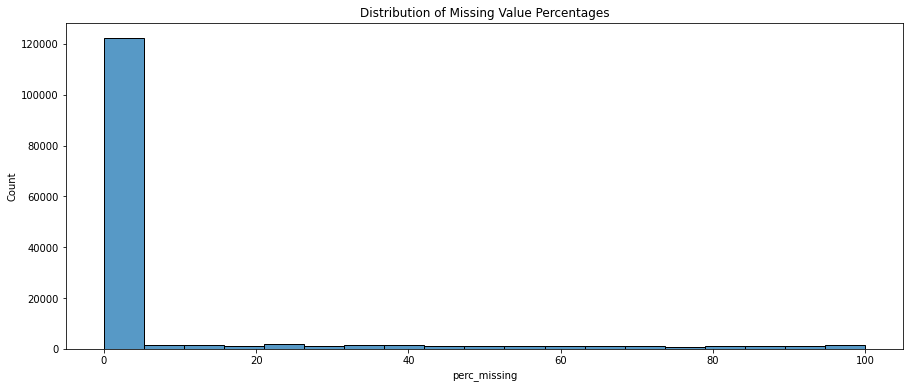

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(df['perc_missing'])
plt.title("Distribution of Missing Value Percentages")
plt.show()

- So we see that 652 pages have null values for all dates. There is not much point in keeping those pages in our dataset. However, we could assign 0 and keep those pages. 

- 117277 pages do not have any null values. That's good news.

- We see that the majority of pages (around 120K) have between 0-5% null values. 

- The question remains on how we should treat the remaining null values. We could assign them the value of 0. Or we could use something like backward fill, moving average. 

1. First we assign 0 for those rows where all columns have null.

In [ ]:
df[df['perc_missing']==100] = df[df['perc_missing']==100].fillna(0)

In [ ]:
df[df['perc_missing']==100].head()

Page  2015-07-01  \
117          Pristin_zh.wikipedia.org_all-access_spider         0.0   
148   TWICEcoaster:_LANE_2_zh.wikipedia.org_all-acce...         0.0   
174   Yuri!!!_on_ICE_zh.wikipedia.org_all-access_spider         0.0   
4282             陳宣儒_zh.wikipedia.org_all-access_spider         0.0   
4283  驚心動魄_(2000年電影)_zh.wikipedia.org_all-access_spider         0.0   

      2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-07-08  2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-07-14  2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-07-20  2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-07-26  2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-08-07  2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0         0.0         0.0         0.0         0.0         0.0   
4282         0.0         0.0         0.0         0.0         0.0         0.0   
4283         0.0         0.0         0.0         0.0         0.0         0.0   

      2015-08-13  2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  \
117          0.0         0.0         0.0         0.0         0.0         0.0   
148          0.0         0.0         0.0         0.0         0.0         0.0   
174          0.0 

2. There are two other types of ways in which we can fill our remaining missing values:

- For missing values appearing in between non null values, we can take a centered moving average method.

- For the missing values which appear before non null values even start appearing, can not really be distinguished from absence of views on those days. So we will go ahead and fill those with 0. 

In [ ]:
#drop percentage column before computing rollinf mean
df.drop(columns = ['perc_missing'], inplace= True)
rolling_fill = df.rolling(5, min_periods=1, center = True, axis = 1).mean()

In [ ]:
df.fillna(rolling_fill, inplace=True)

Now that we have handled the first kind of null values, we fill the remaining null values with 0.

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
#Updating missing percentages

df['perc_missing'] = df.isnull().sum(axis=1)*100/550

In [ ]:
df[df['perc_missing']>0].shape

(0, 552)

So we have successfully handled all of the missing values.

In [ ]:
df.drop(columns = ['perc_missing'], inplace=True)

### Extracting meta data from page name



The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about page name, the main domain, device type used to access the page, and also the request origin(spider or browser agent).

We will extract these for further analysis.

We will treat all other page sources like wikimedia and mediawiki as NotApplicable category as some of them may not even have languages and could be media in different format (not text).

In [ ]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
0        26.0        24.0        19.0        10.0        14.0        15.0   
1        10.0         4.0        41.0        65.0        57.0        38.0   
2         4.0         4.0         1.0         1.0         1.0         6.0   
3        11.0        16.0        16.0        11.0        23.0       145.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
0         8.0        16.0         8.0         8.0        16.0         7.0   
1        20.0        62.0        44.0        15.0        10.0        47.0   
2         8.0         6.0         4.0         5.0         1.0         2.0   
3        14.0        17.0        85.0         4.0        30.0        22.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
0        11.0        10.0        20.0        18.0        15.0        14.0   
1        24.0        17.0        22.0         9.0        39.0        13.0   
2         3.0         8.0         8.0         6.0         6.0         2.0   
3         9.0        10.0        11.0         7.0         7.0        11.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
0        49.0        10.0        16.0        18.0         8.0         5.0   
1        11.0        12.0        21.0        19.0         9.0        15.0   
2         2.0         3.0         2.0         4.0         3.0         3.0   
3         9.0        11.0        44.0         8.0        14.0        19.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
0         9.0         7.0        13.0         9.0         7.0         4.0   
1        33.0         8.0         8.0         7.0        13.0         2.0   
2         5.0         3.0         5.0         4.0         2.0         5.0   
3        10.0        17.0        17.0        10.0         7.0        10.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
0        11.0        10.0         5.0         9.0         9.0         9.0   
1        23.0        12.0        27.0        27.0        36.0        23.0   
2         1.0         4.0         5.0         0.0         0.0         7.0   
3         1.0         8.0        27.0        19.0        16.0         2.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
0         9.0        13.0         4.0        15.0        25.0         9.0   
1        58.0        80.0        60.0        69.0        42.0       161.0   
2         3.0         5.0         1.0         6.0         2.0         5.0   
3        84.0     

In [ ]:
def get_metadata(str_val, ret_val):
    m = re.search('(.*)\_(.*).wikipedia.org\_(.*)\_(.*)', str_val)
    if m is not None :
      if ret_val == 'article_name':
        return m.group(1)
      elif ret_val == 'language':
        return m.group(2)
      elif ret_val =='access_type':
        return m.group(3)
      else:
        return m.group(4)
    else:
      #for wikimedia and mediawiki pages
        return "NA"

In [ ]:
df['article_name'] = df['Page'].apply(lambda x: get_metadata(x, 'article_name'))
df['language'] = df['Page'].apply(lambda x: get_metadata(x, 'language'))
df['access_type'] = df['Page'].apply(lambda x: get_metadata(x, 'access_type'))
df['access_origin'] = df['Page'].apply(lambda x: get_metadata(x, 'access_origin'))

In [ ]:
df['language'].value_counts(normalize=True)

en    0.166190
ja    0.140842
de    0.127855
NA    0.123084
fr    0.122719
zh    0.118769
ru    0.103555
es    0.096985
Name: language, dtype: float64

### Data Vizualization and Analysis

We might be interested to look at trends of views across languages. 

In [ ]:
df['language'] = df['language'].map(
      { 'en':'English','ja':'Japanese','de':'German',
        'NA':'NotApplicable','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }
)

In [ ]:
cols_to_sum = df.select_dtypes(include='float64').columns
cols_to_sum

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [ ]:
plot_lang = df.groupby(['language'])[cols_to_sum].sum().transpose().reset_index()
plot_lang.rename(columns = {'index':'date'}, inplace=True)
plot_lang.drop(columns=['NotApplicable'], inplace=True)

In [ ]:
num_pages = df['language'].value_counts()
num_pages

English          24108
Japanese         20431
German           18547
NotApplicable    17855
French           17802
Chinese          17229
Russian          15022
Spanish          14069
Name: language, dtype: int64

In [ ]:
cols = plot_lang.select_dtypes(include=['float64']).columns

for col in cols:
  plot_lang[col+str('_per_page')] = plot_lang[col]/num_pages[col]

#### Views per page across different languages

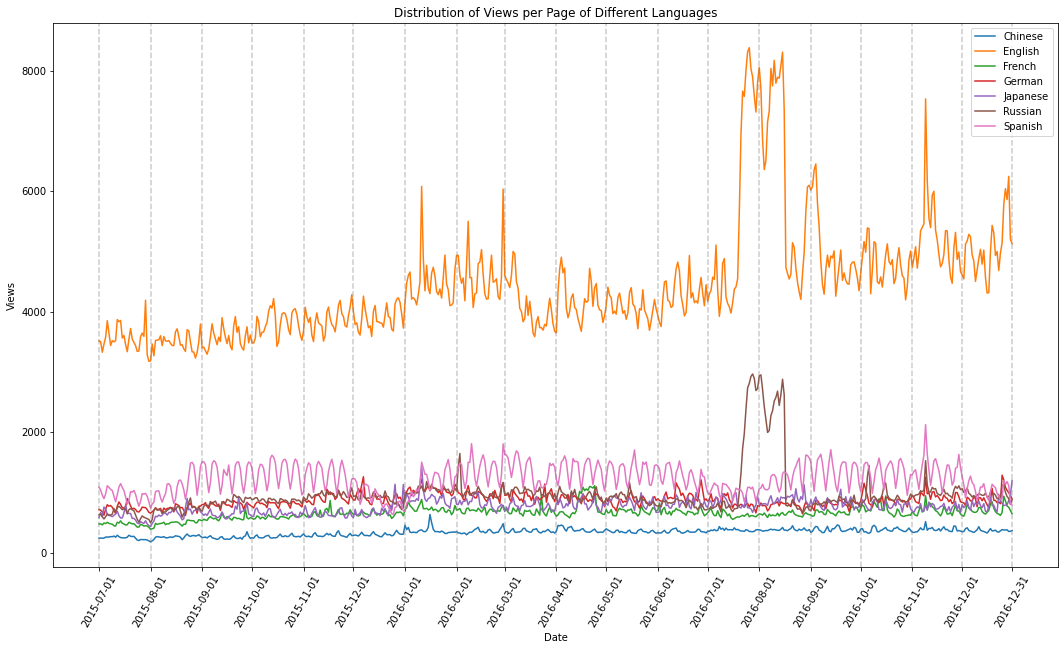

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in cols:
  sns.lineplot(data = plot_lang, x = 'date', y = col+str('_per_page'), label = str(col))
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views per Page of Different Languages")
plt.show()

 - English has the highest number of views, since most wikipedia articles are written in English. 
 
 - The English and Russian series have spikes from mid-July 2016 to mid-August 2016.

 - The English data also has spikes between January and March 2016, and then again around the beginning of September 2016, November 2016 and then towards the end of December 2016. 


- The Spanish data seems to be fluctuating periodically every 6 months.

#### Distribution of No of Pages (Total and Unique) across Languages

In [ ]:
unique_views = df.groupby(['language']).agg({"article_name": ['nunique','count'] })
unique_views = unique_views.article_name.reset_index()
unique_views

language  nunique  count
0        Chinese     5505  17229
1        English    11048  24108
2         French     5852  17802
3         German     6834  18547
4       Japanese     6961  20431
5  NotApplicable        1  17855
6        Russian     4794  15022
7        Spanish     4698  14069

So we see that the number of unique pages and total number of pages is not the same. We will plot both. (NA is a special case because all wikimedia and mediawiki articles were named NA).

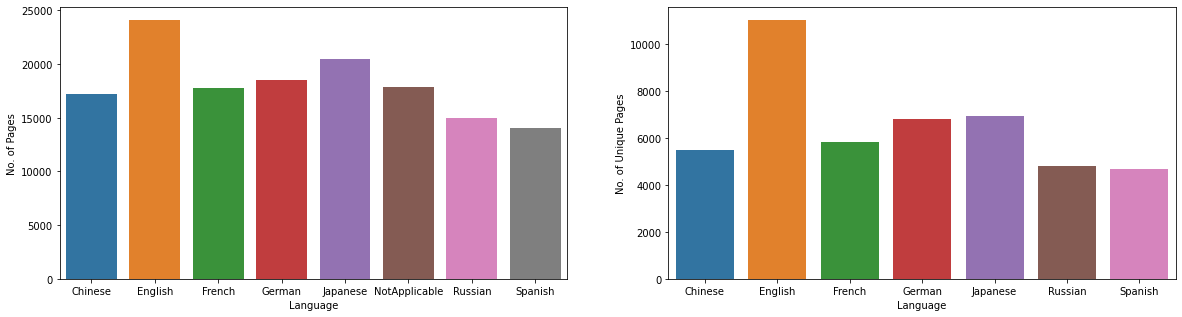

In [ ]:
uv_unique = df.groupby(['language'])['article_name'].nunique().reset_index()
uv_total = df.groupby(['language'])['article_name'].count().reset_index()

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=uv_total['language'], y=uv_total['article_name'])
plt.xlabel('Language')
plt.ylabel('No. of Pages')

plt.subplot(1,2,2)
sns.barplot(x=uv_unique[uv_unique['language']!='NotApplicable']['language'], y=uv_unique[uv_unique['language']!='NotApplicable']['article_name'])
plt.xlabel('Language')
plt.ylabel('No. of Unique Pages')

plt.show()

- **Total Pages** : English has the highest number of pages, followed by Japanese, German, French, Chinese, Russian and Spanish.
- There's also quite a few wikimedia and mediawiki pages. 

- **Unique Pages** : English also has the highest number of unique pages, followed by Japanese, German, French, Chinese, Russian and Spanish.

#### Distribution of No of Pages across Access Types

In [ ]:
unique_views_at = df.groupby(['access_type']).agg({"article_name": ['nunique','count'] })
unique_views_at = unique_views_at.article_name.reset_index()
unique_views_at

access_type  nunique  count
0          NA        1  17855
1  all-access    32395  65713
2     desktop    28178  30572
3  mobile-web    28086  30923

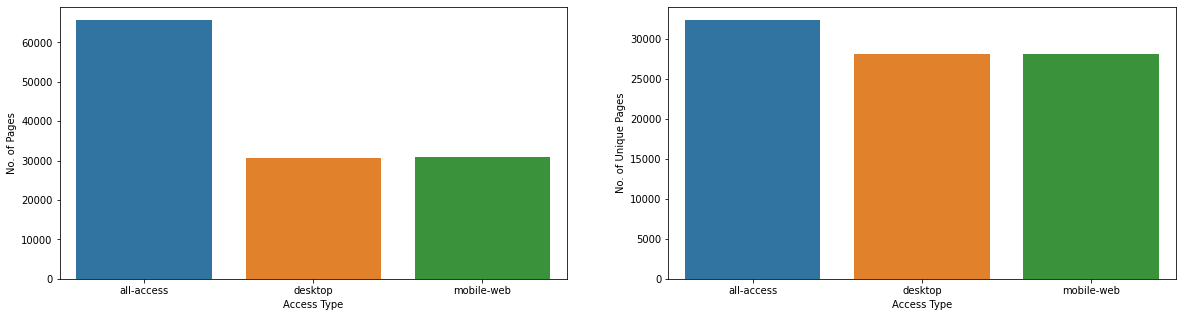

In [ ]:
uv_unique_at = df.groupby(['access_type'])['article_name'].nunique().reset_index()
uv_total_at = df.groupby(['access_type'])['article_name'].count().reset_index()

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=uv_total_at[uv_total_at['access_type']!='NA']['access_type'], y=uv_total_at[uv_total_at['access_type']!='NA']['article_name'])
plt.xlabel('Access Type')
plt.ylabel('No. of Pages')

plt.subplot(1,2,2)
sns.barplot(x=uv_unique_at[uv_unique_at['access_type']!='NA']['access_type'], y=uv_unique_at[uv_unique_at['access_type']!='NA']['article_name'])
plt.xlabel('Access Type')
plt.ylabel('No. of Unique Pages')

plt.show()

- **Total Pages** : So the highest number of pages had access type as 'all-access', followed by  'mobile-web' and 'desktop' which are almost similar (mobile is slightly higher) and nearly half the value of 'all-access'

- **Unique Pages** : Here, 'all-access' once again is the highest (around 32 K unique pages), however, the difference with the other two methods is not as stark (both are around 28K).

#### Distribution of No of Pages across Access Origins

In [ ]:
unique_views_or = df.groupby(['access_origin']).agg({"article_name": ['nunique','count'] })
unique_views_or = unique_views_or.article_name.reset_index()
unique_views_or = unique_views_or[unique_views_or['access_origin']!='NA']
unique_views_or

access_origin  nunique  count
1    all-agents    42212  96594
2        spider    27897  30614

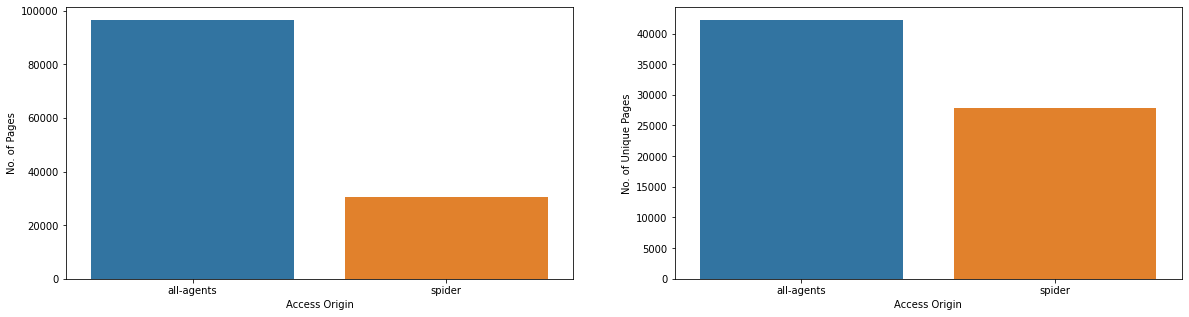

In [ ]:
uv_unique_or = df.groupby(['access_origin'])['article_name'].nunique().reset_index()
uv_total_or = df.groupby(['access_origin'])['article_name'].count().reset_index()

uv_unique_or = uv_unique_or[uv_unique_or['access_origin']!='NA']
uv_total_or = uv_total_or[uv_total_or['access_origin']!='NA']

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.barplot(x=uv_total_or['access_origin'], y=uv_total_or['article_name'])
plt.xlabel('Access Origin')
plt.ylabel('No. of Pages')

plt.subplot(1,2,2)
sns.barplot(x=uv_unique_or['access_origin'], y=uv_unique_or['article_name'])
plt.xlabel('Access Origin')
plt.ylabel('No. of Unique Pages')

plt.show()

- The 'all-agents' access origin is a lot more frequent origin than 'spider'. 

#### Top Pages for Every Language

We will look at how the views of the top (based on total views) pages of each language compare with the overall views acorss that language.

In [ ]:
cols_to_sum = df.select_dtypes(include='float64').columns
cols_to_sum

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [ ]:
pd.options.mode.chained_assignment = None

#English Pages
eng = df[df['language']=='English']
eng['total'] = df[cols_to_sum].sum(axis=1)
eng = eng.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

eng.columns = eng.iloc[0]
eng = eng[1:]
eng.rename(columns = {'Page':'date'}, inplace=True)


#Japanese
jap = df[df['language']=='Japanese']
jap['total'] = df[cols_to_sum].sum(axis=1)
jap = jap.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

jap.columns = jap.iloc[0]
jap = jap[1:]
jap.rename(columns = {'Page':'date'}, inplace=True)


#German
de = df[df['language']=='German']
de['total'] = de[cols_to_sum].sum(axis=1)
de = de.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

de.columns = de.iloc[0]
de = de[1:]
de.rename(columns = {'Page':'date'}, inplace=True)


#French
fr = df[df['language']=='French']
fr['total'] = df[cols_to_sum].sum(axis=1)
fr = fr.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

fr.columns = fr.iloc[0]
fr = fr[1:]
fr.rename(columns = {'Page':'date'}, inplace=True)


#Chinese
ch = df[df['language']=='Chinese']
ch['total'] = df[cols_to_sum].sum(axis=1)
ch = ch.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

ch.columns = ch.iloc[0]
ch = ch[1:]
ch.rename(columns = {'Page':'date'}, inplace=True)


#Russian
ru = df[df['language']=='Russian']
ru['total'] = df[cols_to_sum].sum(axis=1)
ru = ru.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

ru.columns = ru.iloc[0]
ru = ru[1:]
ru.rename(columns = {'Page':'date'}, inplace=True)


#Spanish
es = df[df['language']=='Spanish']
es['total'] = df[cols_to_sum].sum(axis=1)
es = es.sort_values(by = 'total', ascending=False)[0:2].transpose()[:-5].reset_index()

es.columns = es.iloc[0]
es = es[1:]
es.rename(columns = {'Page':'date'}, inplace=True)

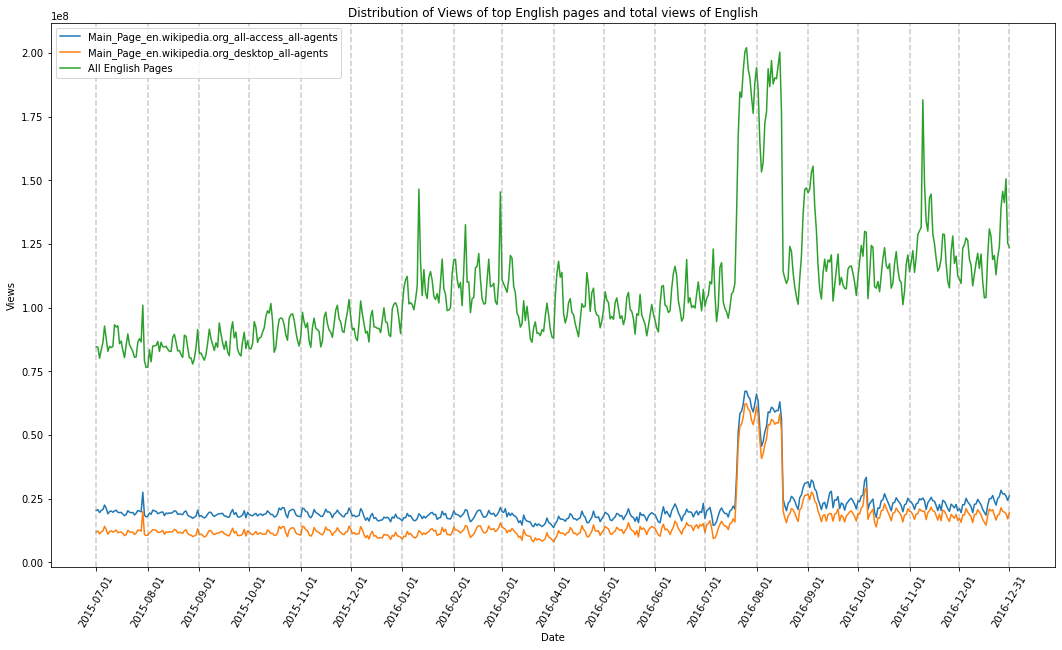

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in eng.columns[1:]:
  sns.lineplot(data = eng, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'English', label = "All English Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top English pages and total views of English")
plt.show()

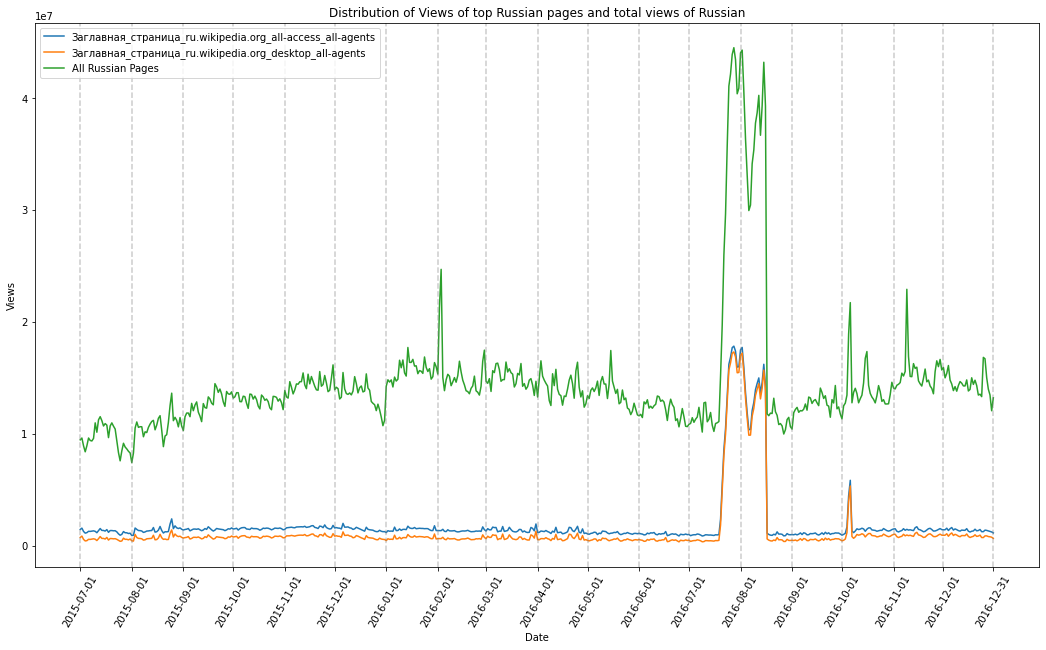

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in ru.columns[1:]:
  sns.lineplot(data = ru, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'Russian', label = "All Russian Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top Russian pages and total views of Russian")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_

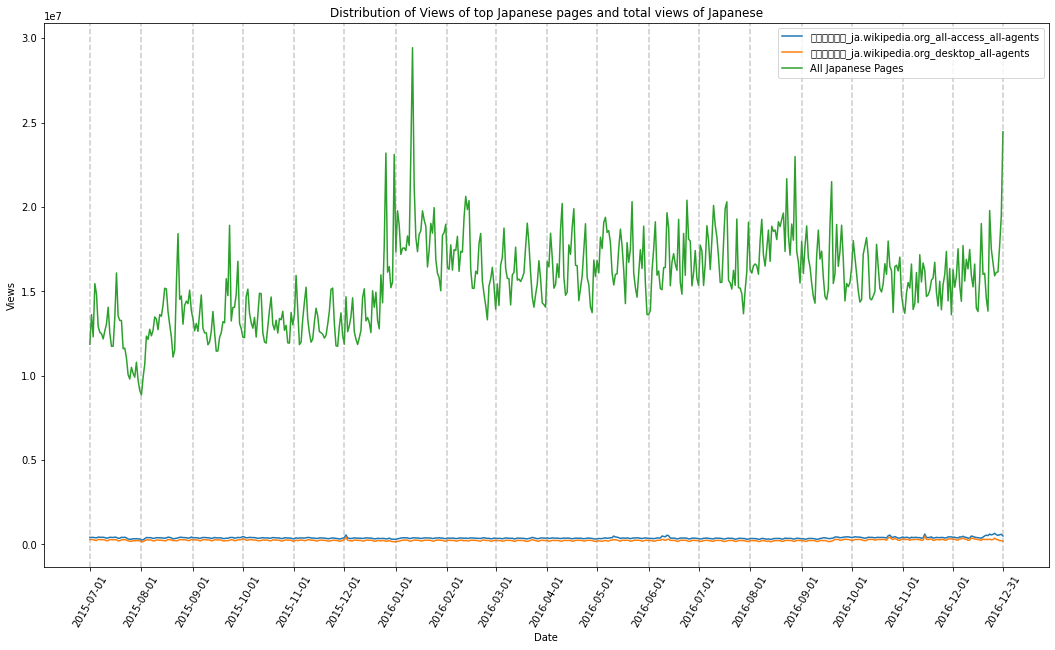

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in jap.columns[1:]:
  sns.lineplot(data = jap, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'Japanese', label = "All Japanese Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top Japanese pages and total views of Japanese")
plt.show()

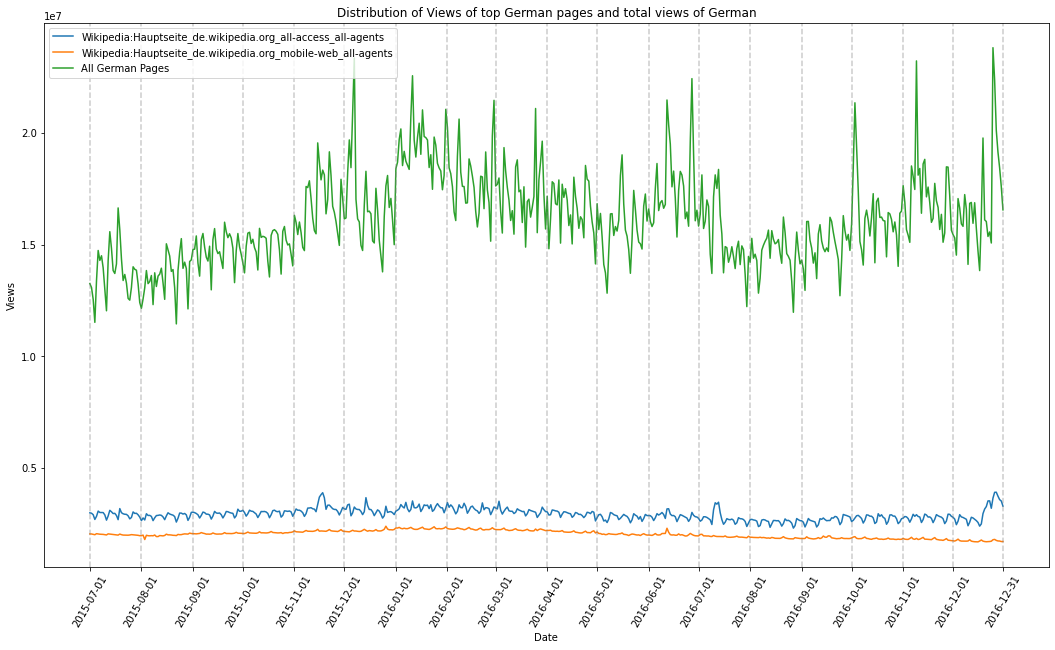

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in de.columns[1:]:
  sns.lineplot(data = de, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'German', label = "All German Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top German pages and total views of German")
plt.show()

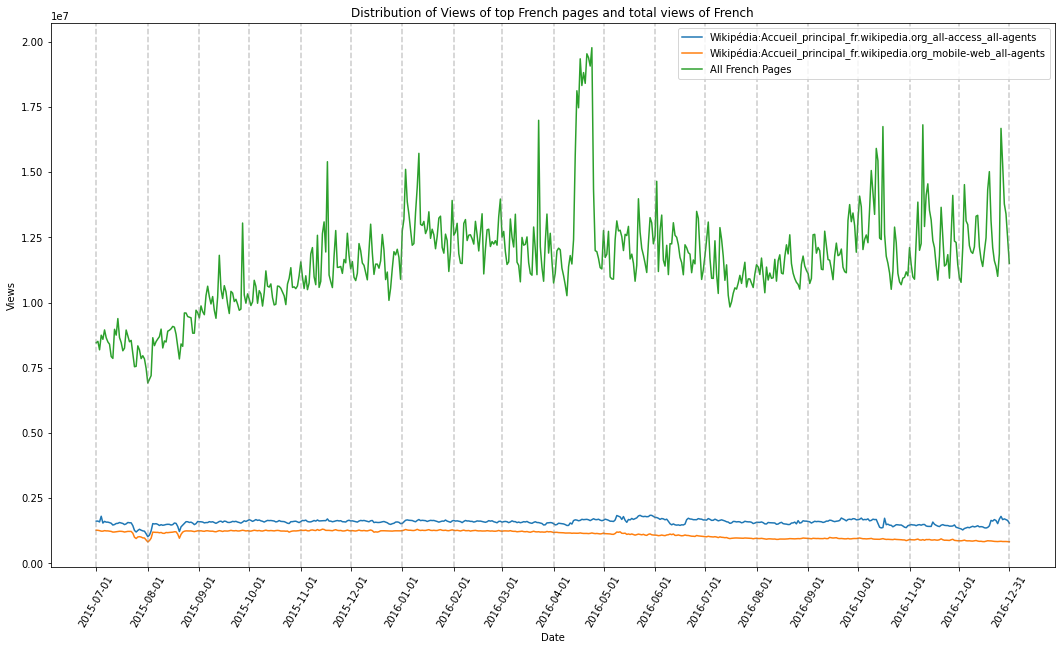

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in fr.columns[1:]:
  sns.lineplot(data = fr, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'French', label = "All French Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top French pages and total views of French")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


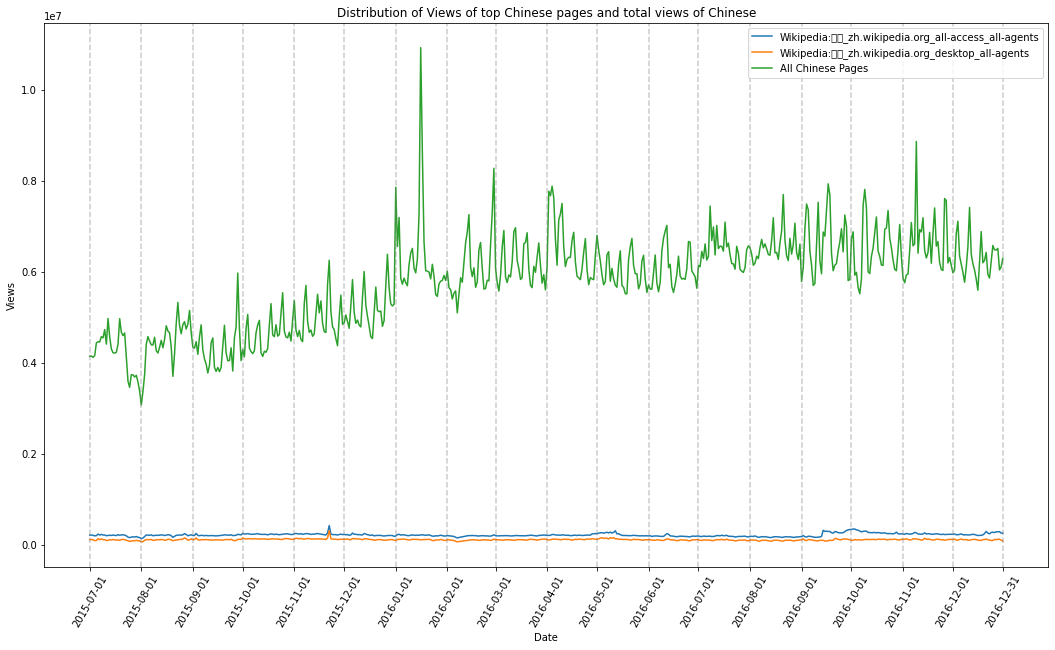

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in ch.columns[1:]:
  sns.lineplot(data = ch, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'Chinese', label = "All Chinese Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top Chinese pages and total views of Chinese")
plt.show()

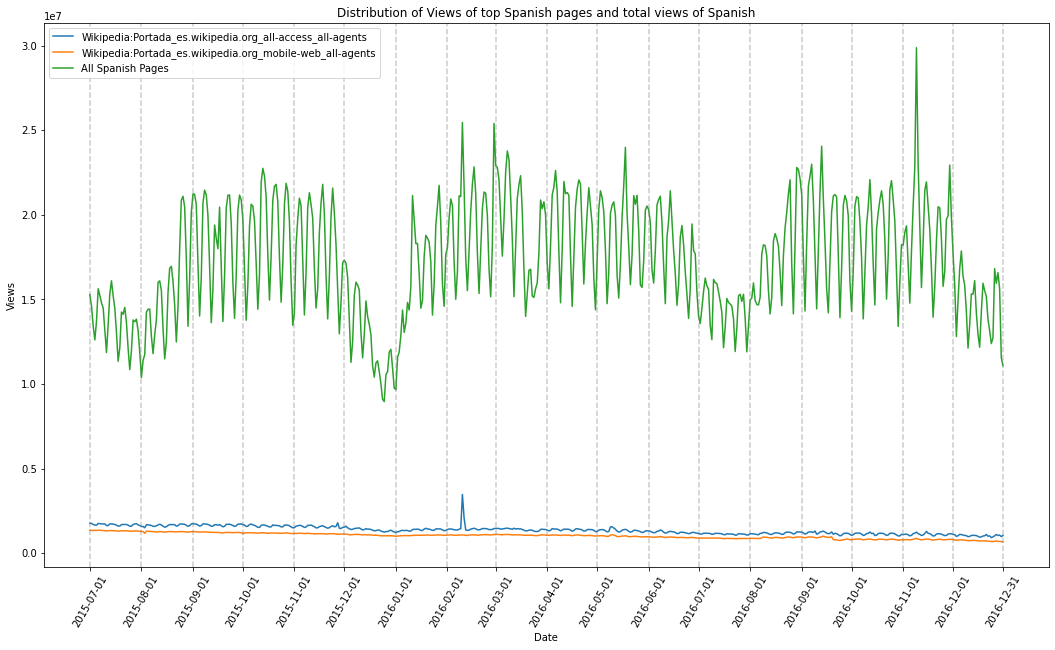

In [ ]:
plt.figure(figsize=(18, 10))
days_labels = [ 0,31,62,92,123,153,184,215,244,275,305,336,366,397,428,458,489,519,549 ]

for col in es.columns[1:]:
  sns.lineplot(data = es, x = 'date', y = col, label = str(col))
sns.lineplot(data = plot_lang, x = 'date', y = 'Spanish', label = "All Spanish Pages")
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(days_labels, rotation = 60)
plt.legend()

for i in days_labels:
  plt.axvline(x = i, linestyle='--', alpha = 0.4, color = 'gray')

plt.title("Distribution of Views of top Spanish pages and total views of Spanish")
plt.show()

- It appears that the top 2 pages in English and Russian languages also contribute most starkly to the peaks of their aggregate (total) language wise views. Perhaps, these peaks were triggered by certain events, and the top pages were the sites that most viewers landed up on first, while looking for those events.

- The effect of the top pages is not so pronounced in the other languages, indicating that their top pages probably do not correspond to the events leading to spikes. 

### Preparing the data for modeling.

First we will extract the language-wise mean views

In [ ]:
date_vals = df.select_dtypes(include='float64').columns
tseries = df.rename(columns={'language':'date'}).groupby(['date'])[date_vals].mean().reset_index()
tseries = tseries.drop(5)
tseries

date   2015-07-01   2015-07-02   2015-07-03   2015-07-04   2015-07-05  \
0   Chinese   240.664664   241.045988   239.379699   241.660853   257.898800   
1   English  3513.956405  3502.558978  3325.395457  3462.147133  3575.644644   
2    French   475.153915   478.322501   459.984136   491.515392   482.592129   
3    German   714.972367   705.240012   676.884725   621.195652   722.130682   
4  Japanese   580.668249   666.686718   602.317981   756.523689   725.722640   
6   Russian   630.003295   640.906304   594.286003   559.005908   595.034843   
7   Spanish  1085.974234  1037.903807   954.511769   896.081077   974.583855   

    2015-07-06   2015-07-07   2015-07-08   2015-07-09   2015-07-10  \
0   259.294886   258.949141   265.781110   264.188853   274.753076   
1  3849.785265  3643.660320  3437.997276  3518.413746  3499.466574   
2   502.805916   485.985311   477.045585   472.074870   445.521074   
3   794.847833   770.836276   782.091717   752.943252   701.712541   
4   632.405756   615.212496   611.506555   596.143764   619.395530   
6   641.001931   626.346115   623.492572   638.705865   731.258865   
7  1110.727000  1082.577860  1050.685656  1030.849444   937.132046   

    2015-07-11   2015-07-12   2015-07-13   2015-07-14   2015-07-15  \
0   256.193719   288.854785   265.390432   250.139668   245.297792   
1  3517.129362  3869.516627  3832.735164  3854.278293  3563.084602   
2   441.537220   504.177803   491.647090   527.299063   486.515485   
3   649.162106   770.124611   840.311039   799.725036   746.426331   
4   639.669669   688.089676   613.370740   574.586682   575.208507   
6   675.444542   749.427395   768.145664   744.574030   712.731344   
7   842.815884   960.252103  1089.547314  1144.236774  1081.189175   

    2015-07-16   2015-07-17   2015-07-18   2015-07-19   2015-07-20  \
0   244.766276   245.767819   256.074927   288.665269   271.470578   
1  3605.232537  3455.765071  3335.361294  3540.620337  3720.947891   
2   475.724338   457.939557   463.626741   502.637382   490.110414   
3   739.284880   762.365733   897.703416   845.230895   774.530508   
4   658.034922   787.638026   662.534184   649.692277   649.638878   
6   726.911080   717.832374   643.388747   712.626392   731.164470   
7  1029.525843   926.546692   806.158469   862.298683  1012.977308   

    2015-07-21   2015-07-22   2015-07-23   2015-07-24   2015-07-25  \
0   267.098424   270.406862   240.622579   209.014636   201.154265   
1  3544.314654  3488.596873  3436.052351  3340.359455  3347.006962   
2   477.322871   480.338263   452.481346   423.584429   424.482797   
3   722.317477   736.917120   715.948010   678.996257   674.906683   
4   567.661381   569.572366   541.134077   492.339415   479.861179   
6   711.589219   694.540629   624.162345   553.935034   505.165374   
7  1003.403126  1032.566393   968.831047   860.520696   771.200974   

    2015-07-26   2015-07-27   2015-07-28   2015-07-29   2015-07-30  \
0   217.220060   217.082695   214.310412   216.488159   208.152949   
1  3585.758655  3643.688890  3590.104198  4189.755603  3283.458855   
2   468.520906   459.927321   441.050533   447.288769   440.421563   
3   705.447808   755.438629   749.422755   747.246419   714.241989   
4   513.793435   496.519456   485.330450   528.644764   476.955056   
6   564.267619   609.797136   587.533723   576.063313   561.997886   
7   850.558563   979.501700   972.172199   983.101464   935.032406   

    2015-07-31   2015-08-01   2015-08-02   2015-08-03   2015-08-04  \
0   196.445165   178.652592   195.815036   217.281691   256.164693   
1  3175.811314  3181.356040  3462.817270  3267.604955  3522.523028   
2   419.975490   388.495862   396.474464   404.416021   486.069978   
3   668.984562   655.212604   677.765919   704.741665   746.417754   
4   446.849922   433.870572   483.956802   522.801857   604.176570   
6   551.981089   494.431451   551.766459   700.315082   736.693666   
7   844.787831   737.826374   809.886174   834.685609  1012.501457   



Next we will extract some features like whether it is a weekday, what day of month it is, what month and year it is, etc. and create dataframes for every language.

In [ ]:
# Weekday to dayname mapping
day_to_name = {0:'Mon',1:'Tue',2:'Wed',3:'Thurs', 4:'Fri', 5:'Sat',6:'Sun'}

# Function to generate time series for different languages
def get_lang_df(i):
  lang_df = pd.DataFrame()
  lang_df['date'] = list(tseries.iloc[i, 1:].index)
  lang_df['date'] = pd.to_datetime(lang_df['date'])
  lang_df['views'] = tseries.iloc[i, 1:].values
  lang_df['weekday'] = lang_df['date'].dt.weekday
  lang_df['dayname'] = lang_df['weekday'].map(day_to_name)
  lang_df['weekend'] = lang_df['weekday'].apply(lambda x: 1 if x in [5,6] else 0)
  lang_df['day'] = lang_df['date'].dt.day
  lang_df['month'] = lang_df['date'].dt.month
  lang_df['year'] = lang_df['date'].dt.year
  return lang_df

In [ ]:
chinese = get_lang_df(0)
english = get_lang_df(1)
french = get_lang_df(2)
german = get_lang_df(3)
japanese = get_lang_df(4)
russian = get_lang_df(5)
spanish = get_lang_df(6)

russian

date        views  weekday dayname  weekend  day  month  year
0   2015-07-01   630.003295        2     Wed        0    1      7  2015
1   2015-07-02   640.906304        3   Thurs        0    2      7  2015
2   2015-07-03   594.286003        4     Fri        0    3      7  2015
3   2015-07-04   559.005908        5     Sat        1    4      7  2015
4   2015-07-05   595.034843        6     Sun        1    5      7  2015
..         ...          ...      ...     ...      ...  ...    ...   ...
545 2016-12-27  1001.226851        1     Tue        0   27     12  2016
546 2016-12-28   931.991274        2     Wed        0   28     12  2016
547 2016-12-29   897.283861        3   Thurs        0   29     12  2016
548 2016-12-30   803.274076        4     Fri        0   30     12  2016
549 2016-12-31   880.247437        5     Sat        1   31     12  2016

[550 rows x 8 columns]

We will extract the holidays for the countries where the languages are apoken predominantly to capture if there's any effect of such holidays on views.

Please Note however, that articles written in Chinese are not necessarily available in China. According to Wikipedia itself , "Access to Wikipedia has varied over the years with the Chinese language version being controlled more tightly than other versions. As of April 2019, all versions of Wikipedia are blocked in Mainland China under the Great Firewall. The Chinese Wikipedia was launched in May 2001." Hence it makes more sense to consider the holidays of HongKong (Cantonese) and Taiwan (Mandarin) for the analysis. 

In [ ]:
from datetime import date
import holidays

#Predominantly english speaking countries
us_holidays = holidays.US(years=[2015,2016])
uk_holidays = holidays.GB(years=[2015,2016])
ca_holidays = holidays.CA(years=[2015,2016])
au_holidays = holidays.AU(years=[2015,2016])

#Russian 
ru_holidays = holidays.RU(years=[2015,2016])

#Predominantly spanish speaking countries
mx_holidays = holidays.MX(years=[2015,2016])
co_holidays = holidays.CO(years=[2015,2016])
sp_holidays = holidays.ES(years=[2015,2016])
ar_holidays = holidays.AR(years=[2015,2016])

#French
fr_holidays = holidays.FR(years=[2015,2016])

#Japanese
jp_holidays = holidays.JP(years=[2015,2016])

#Predominantly german speaking countries
de_holidays = holidays.DE(years=[2015,2016])
at_holidays = holidays.AT(years=[2015,2016])
sz_holidays = holidays.SZ(years=[2015,2016])

#Predominantly chinese speaking countries 
tw_holidays = holidays.TW(years=[2015,2016])
hk_holidays = holidays.HK(years=[2015,2016])


def check_if_holiday(x, holiday_dict):
  if x in holiday_dict:
    return 1 
  else:
    return 0

#Example
print(check_if_holiday('2016-01-01', us_holidays))
print(check_if_holiday('2016-02-08', tw_holidays))

1
1


In [ ]:
country_dict = {
    'english': [us_holidays, uk_holidays, ca_holidays, au_holidays],
    'russian': [ru_holidays],
    'spanish': [mx_holidays, co_holidays, sp_holidays, ar_holidays],
    'french' : [fr_holidays],
    'japanese' : [jp_holidays],
    'german' : [de_holidays, at_holidays, sz_holidays],
    'chinese' : [tw_holidays, hk_holidays]
}

def get_holiday_cols(langdf, lang, country_dict, country_list):
  countries = country_dict[lang]
  for country_name, country in zip(country_list, countries):
    langdf[country_name] = langdf['date'].apply(lambda x : check_if_holiday(x, country))

In [ ]:
get_holiday_cols(english, 'english', country_dict, ['us','uk','ca','au'])
get_holiday_cols(russian, 'russian', country_dict, ['ru'])
get_holiday_cols(spanish, 'spanish', country_dict, ['mx','co','sp','ar'])
get_holiday_cols(french, 'french', country_dict, ['fr'])
get_holiday_cols(japanese, 'japanese', country_dict, ['jp'])
get_holiday_cols(german, 'german', country_dict, ['de','at','sz'])
get_holiday_cols(chinese, 'chinese', country_dict, ['tw','hk'])

Aditionally for Enlish, we have data for exogenous campaigns (data for the dates which had a campaign or significant event that could affect the views for that day). We will add one column for that.

In [ ]:
exog = pd.read_csv('/content/drive/MyDrive/Copy of Exog_Campaign_eng.csv')
exog.head()

Exog
0     0
1     0
2     0
3     0
4     0

In [ ]:
english['exog'] = exog
english

date        views  weekday dayname  weekend  day  month  year  us  \
0   2015-07-01  3513.956405        2     Wed        0    1      7  2015   0   
1   2015-07-02  3502.558978        3   Thurs        0    2      7  2015   0   
2   2015-07-03  3325.395457        4     Fri        0    3      7  2015   1   
3   2015-07-04  3462.147133        5     Sat        1    4      7  2015   1   
4   2015-07-05  3575.644644        6     Sun        1    5      7  2015   0   
..         ...          ...      ...     ...      ...  ...    ...   ...  ..   
545 2016-12-27  6040.712167        1     Tue        0   27     12  2016   0   
546 2016-12-28  5860.271504        2     Wed        0   28     12  2016   0   
547 2016-12-29  6245.249862        3   Thurs        0   29     12  2016   0   
548 2016-12-30  5201.905543        4     Fri        0   30     12  2016   0   
549 2016-12-31  5127.920877        5     Sat        1   31     12  2016   0   

     uk  ca  au  exog  
0     0   1   0     0  
1     0   0   0     0  
2     0   0   0     0  
3     0   0   0     0  
4     0   0   0     0  
..   ..  ..  ..   ...  
545   1   1   1     1  
546   0   0   0     1  
547   0   0   0     1  
548   0   0   0     0  
549   0   0   0     0  

[550 rows x 13 columns]

In [ ]:
russian.head(5)

date       views  weekday dayname  weekend  day  month  year  ru
0 2015-07-01  630.003295        2     Wed        0    1      7  2015   0
1 2015-07-02  640.906304        3   Thurs        0    2      7  2015   0
2 2015-07-03  594.286003        4     Fri        0    3      7  2015   0
3 2015-07-04  559.005908        5     Sat        1    4      7  2015   0
4 2015-07-05  595.034843        6     Sun        1    5      7  2015   0

In [ ]:
spanish.tail(7)

date        views  weekday dayname  weekend  day  month  year  mx  \
543 2016-12-25   903.837177        6     Sun        1   25     12  2016   1   
544 2016-12-26  1195.482746        0     Mon        0   26     12  2016   1   
545 2016-12-27  1133.368612        1     Tue        0   27     12  2016   0   
546 2016-12-28  1178.292582        2     Wed        0   28     12  2016   0   
547 2016-12-29  1112.208686        3   Thurs        0   29     12  2016   0   
548 2016-12-30   821.708295        4     Fri        0   30     12  2016   0   
549 2016-12-31   787.400455        5     Sat        1   31     12  2016   0   

     co  sp  ar  
543   1   0   1  
544   0   1   0  
545   0   0   0  
546   0   0   0  
547   0   0   0  
548   0   0   0  
549   0   0   0

### Some More Vizualizations

#### Monthly Views acorss Years for different Languages

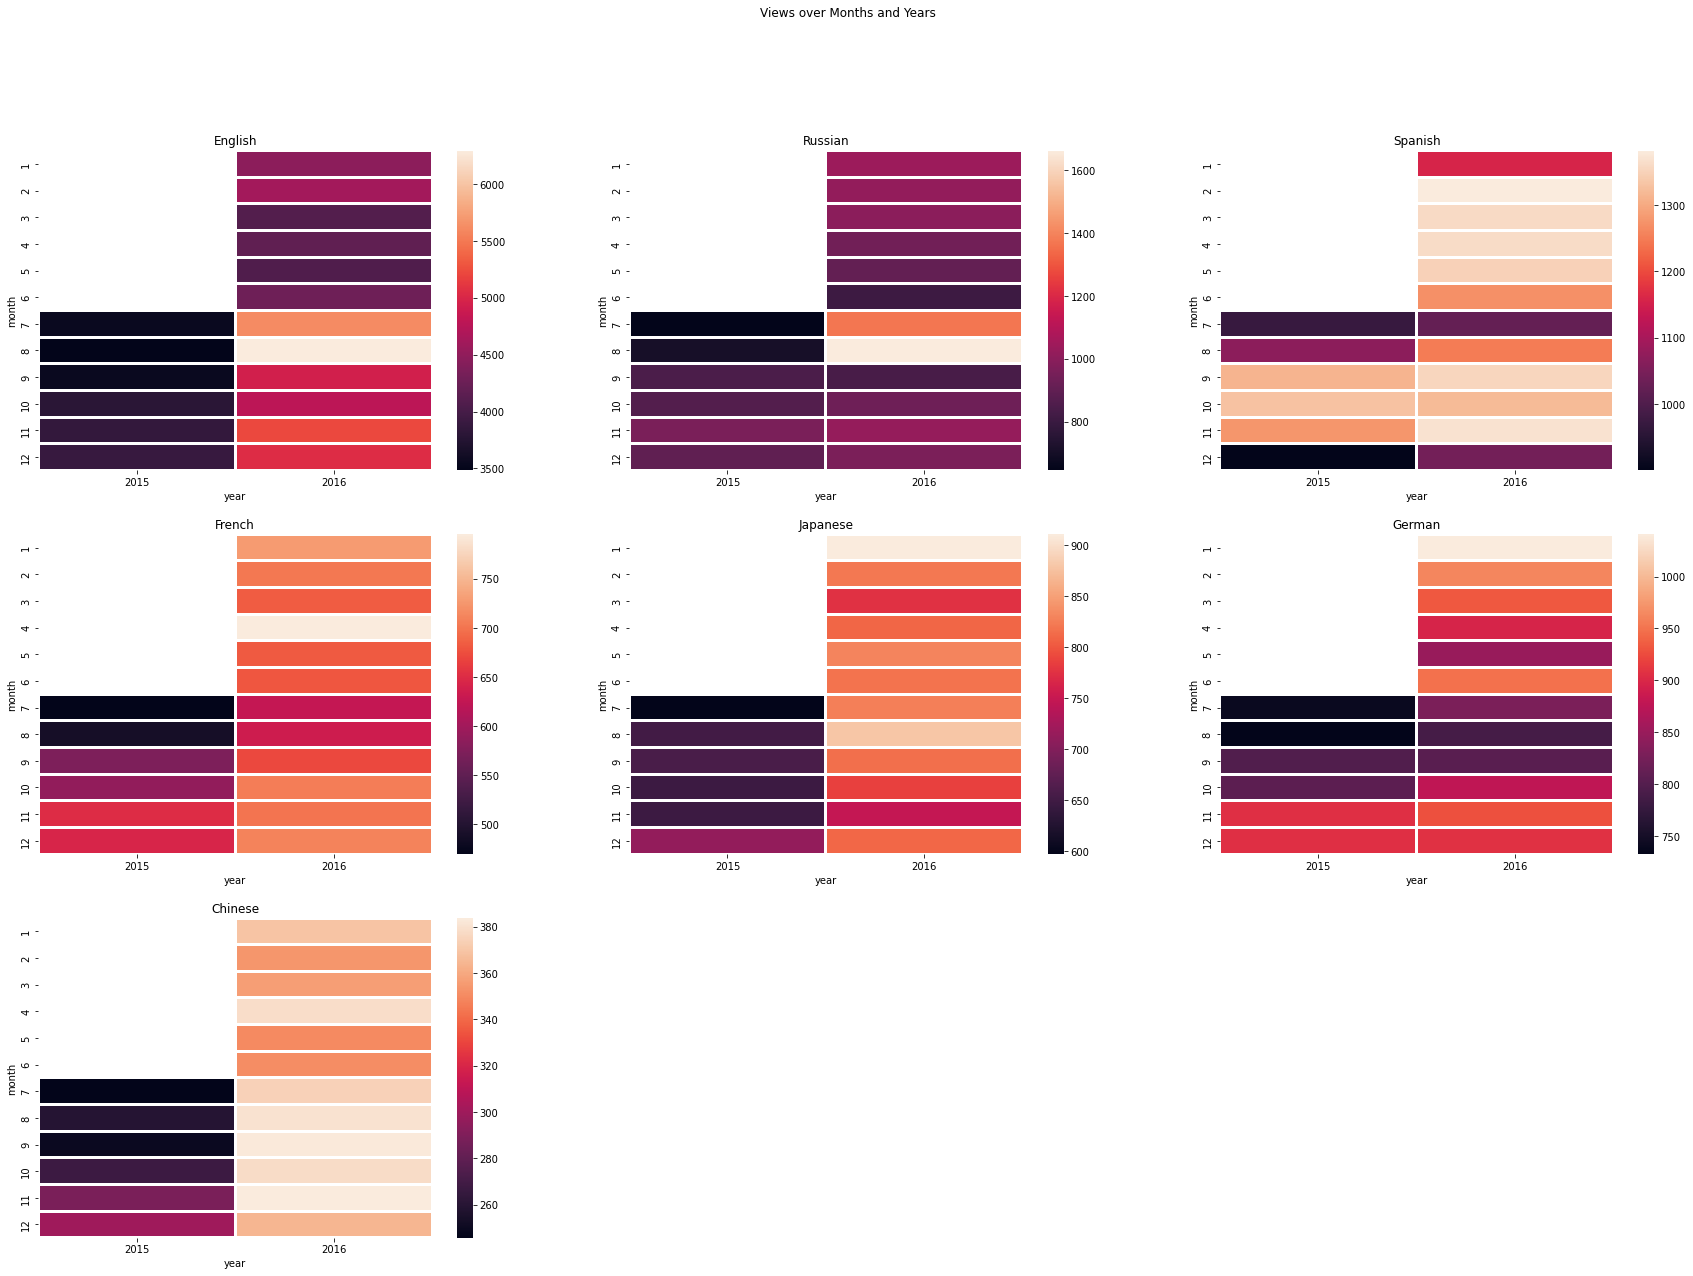

In [ ]:
eng_m_y = english.groupby(['year','month'])['views'].mean().reset_index()
eng_m_y = eng_m_y.pivot('month','year','views')
eng_m_y.sort_index(inplace=True)

rus_m_y = russian.groupby(['year','month'])['views'].mean().reset_index()
rus_m_y = rus_m_y.pivot('month','year','views')
rus_m_y.sort_index(inplace=True)

esp_m_y = spanish.groupby(['year','month'])['views'].mean().reset_index()
esp_m_y = esp_m_y.pivot('month','year','views')
esp_m_y.sort_index(inplace=True)

fre_m_y = french.groupby(['year','month'])['views'].mean().reset_index()
fre_m_y = fre_m_y.pivot('month','year','views')
fre_m_y.sort_index(inplace=True)

jap_m_y = japanese.groupby(['year','month'])['views'].mean().reset_index()
jap_m_y = jap_m_y.pivot('month','year','views')
jap_m_y.sort_index(inplace=True)

ger_m_y = german.groupby(['year','month'])['views'].mean().reset_index()
ger_m_y = ger_m_y.pivot('month','year','views')
ger_m_y.sort_index(inplace=True)

chn_m_y = chinese.groupby(['year','month'])['views'].mean().reset_index()
chn_m_y = chn_m_y.pivot('month','year','views')
chn_m_y.sort_index(inplace=True)

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(3,3, figsize = (30, 20))

sns.heatmap(eng_m_y, annot=False, ax=ax[0][0], fmt="d", linewidths=2)
ax[0][0].set_title('English')

sns.heatmap(rus_m_y, annot=False, ax=ax[0][1], fmt="d", linewidths=2)
ax[0][1].set_title('Russian')

sns.heatmap(esp_m_y, annot=False, ax=ax[0][2], fmt="d", linewidths=2)
ax[0][2].set_title('Spanish')

sns.heatmap(fre_m_y, annot=False, ax=ax[1][0], fmt="d", linewidths=2)
ax[1][0].set_title('French')

sns.heatmap(jap_m_y, annot=False, ax=ax[1][1], fmt="d", linewidths=2)
ax[1][1].set_title('Japanese')

sns.heatmap(ger_m_y, annot=False, ax=ax[1][2], fmt="d", linewidths=2)
ax[1][2].set_title('German')

sns.heatmap(chn_m_y, annot=False, ax=ax[2][0], fmt="d", linewidths=2)
ax[2][0].set_title('Chinese')

plt.suptitle('Views over Months and Years')

for a in ax.flat:
  # check if something was plotted 
  if not bool(a.has_data()):
      fig.delaxes(a)

plt.show()

Similarly we could also visualize how views change according to day of week, monthly.

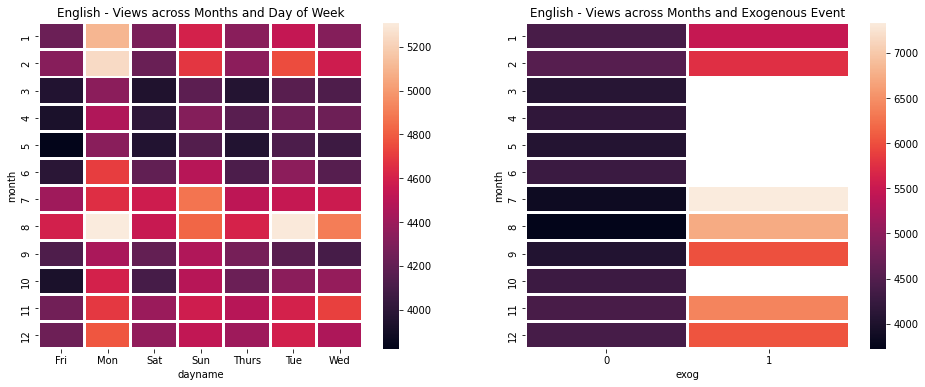

In [ ]:
eng_d_m = english.groupby(['dayname','month'])['views'].mean().reset_index()
eng_d_m = eng_d_m.pivot('month','dayname','views')
eng_d_m.sort_index(inplace=True)

eng_wk_m = english.groupby(['year','dayname'])['views'].mean().reset_index()
eng_wk_m = eng_wk_m.pivot('year','dayname','views')
eng_wk_m.sort_index(inplace=True)

eng_wk_m = english.groupby(['month','exog'])['views'].mean().reset_index()
eng_wk_m = eng_wk_m.pivot('month','exog','views')
eng_wk_m.sort_index(inplace=True)

f, ax = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(eng_d_m, annot=False, ax=ax[0], fmt="d", linewidths=2)
ax[0].set_title('English - Views across Months and Day of Week')

sns.heatmap(eng_wk_m, annot=False, ax=ax[1], fmt="d", linewidths=2)
ax[1].set_title('English - Views across Months and Exogenous Event')

plt.show()

- It appears that the months of March, April and May tend to get the least traffic.
- The month of August got the highest traffic. This could be due to the 2016 Olympics.
- Monday seems to have gotten relatively higher views than the rest of the days.
-
- There were no exogenous variable effect recorded for the months of March, April, May June and October.
- The views are clearly higher when there were exogenous events/campaigns.

### Train-Test Split

We take roughly 10% of the data as test data and perform time based split for the same.

In [ ]:
english_test = english.iloc[495:]
english = english.iloc[0:495]

russian_test = russian.iloc[495:]
russian = russian.iloc[0:495]

chinese_test = chinese.iloc[495:]
chinese = chinese.iloc[0:495]

japanese_test = japanese.iloc[495:]
japanese = japanese.iloc[0:495]

french_test = french.iloc[495:]
french = french.iloc[0:495]

german_test = german.iloc[495:]
german = german.iloc[0:495]

spanish_test = spanish.iloc[495:]
spanish = spanish.iloc[0:495]

### Stationarity

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time.
Non-stationary behaviors can be trends, cycles, random walks, or combinations of the three. 

**Why do we need stationarity** ?
Forecasting a stationary series is relatively easy and the forecasts are more reliable. An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors. We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

#### Checking Stationarity

To quantitatively determine if a given series is stationary or not, we can use statistical tests called ‘Unit Root Tests’ (the tests check if a time series is non-stationary and possess a unit root). The most commonly used is the ADF test **(Augmented Dickey Fuller test)** , where the null hypothesis is the time series possesses a unit root and is non-stationary. 

**H0**: Time series is non-stationary.

**HA**: Time series is stationary.

If the p-Value in ADF test is less than the significance level (0.05), we reject the null hypothesis.

In [ ]:
from statsmodels.tsa.stattools import adfuller


def ADFTest(lang_df, lang):
  result = adfuller(lang_df, autolag='AIC')
  print("Language :", lang)
  print(f'ADF Statistic: {result[0]}')
  print(f'p-value: {result[1]}\n')
  for key, value in result[4].items():
      print(f'Significance Level : {key},  Critical Value : {value}')
  if result[1] < 0.01:
    print("\nConsidering significance of 1%, Null rejected. So, time series is stationary.")
  else:
    print("\nConsidering significance of 1%, Null cannot be rejected. So, time series is non-stationary.")
  print("==========================================================================================")
  print('\n')

print("==========================================================================================")
print("\n")
ADFTest(english.views, 'English')
ADFTest(russian.views, 'Russian')
ADFTest(chinese.views, 'Chinese')
ADFTest(french.views, 'French')
ADFTest(german.views, 'German')
ADFTest(japanese.views, 'Japanese')
ADFTest(spanish.views, "Spanish")



Language : English
ADF Statistic: -2.218297959524756
p-value: 0.19967150490562863

Significance Level : 1%,  Critical Value : -3.4440471158221206
Significance Level : 5%,  Critical Value : -2.867580197120949
Significance Level : 10%,  Critical Value : -2.5699871918402777

Considering significance of 1%, Null cannot be rejected. So, time series is non-stationary.


Language : Russian
ADF Statistic: -3.729751355460081
p-value: 0.003713612486246137

Significance Level : 1%,  Critical Value : -3.4437386290417082
Significance Level : 5%,  Critical Value : -2.867444458865948
Significance Level : 10%,  Critical Value : -2.5699148492415413

Considering significance of 1%, Null rejected. So, time series is stationary.


Language : Chinese
ADF Statistic: -1.7009847124515607
p-value: 0.4306051949377722

Significance Level : 1%,  Critical Value : -3.44407586647939
Significance Level : 5%,  Critical Value : -2.867592847097137
Significance Level : 10%,  Critical Value : -2.5699939338217668

Consid

So, we see that for a significance level of 1%, except Russia, the ADF test tells us that the time series for all the remaining languages are non-stationary.

#### Decomposing the Time Series and Robust Anomaly Detection

We can decompose the series into the trend, seasonality and residual components. There after, it becomes easy for us to convert our time series to stationary time series by detrending it (removing the trend component). It also helps us to remove outliers robustly as discussed next.

Simple clipping the time seires or using IQR ends up not considering the trend. 

Not every spike is necessarily an outlier.

It is better to fit a model and analyse the residual to determine outliers. This is what we will do. We can use the STL decomposition, seasonal_decompose, etc. and use the residuals obtained from there to remove the outliers.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import STL
from datetime import datetime

def decompose_and_detect_outlier(lang_df, lang_name, show_graphs = False, decomp_type='STL'):

  if decomp_type != 'STL':
    result = sm.tsa.seasonal_decompose(lang_df.set_index('date').views, model='additive')
  else:
    stl = STL(lang_df.set_index('date').views)
    result = stl.fit()
    
  seasonal, trend, resid = result.seasonal, result.trend, result.resid

  estimated = trend + seasonal
  
  resid_mu = resid.mean()
  resid_dev = resid.std()

  lower = resid_mu - 3*resid_dev
  upper = resid_mu + 3*resid_dev
  anomalies = lang_df.set_index('date').views[(resid < lower) | (resid > upper)]

  lang_temp = lang_df.set_index('date').views
  lang_temp[anomalies.index] = np.nan
  lang_temp = pd.DataFrame(lang_temp.astype('float64').interpolate(limit=15))
  lang_temp.reset_index(inplace=True)
  lang_df['old_views'] = lang_df['views']
  lang_df['views'] = lang_temp['views']

  if show_graphs == True:
    fig, ax = plt.subplots(4,2,figsize=(16, 8))

    ax[0][0].plot(lang_df.set_index('date').old_views)
    ax[0][0].set_title('Original Series')

    ax[1][0].plot(trend)
    ax[1][0].set_title('Trend')

    ax[2][0].plot(seasonal)
    ax[2][0].set_title('Seasonal')

    ax[3][0].plot(resid)
    ax[3][0].set_title('Residual')

    ax[0][1].plot(lang_df.set_index('date').views, label='original')
    ax[0][1].plot(estimated, label = 'predicted')
    ax[0][1].set_title("Orginal vs Predicted")
    ax[0][1].legend()

    ax[1][1].plot(resid)
    ax[1][1].fill_between([datetime(2015,7,1), datetime(2016,11,6)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
    ax[1][1].set_xlim(datetime(2015,7,1), datetime(2016,11,6))
    ax[1][1].set_title("Residuals beyond (+,-)3 SD")

    ax[2][1].plot(lang_df.set_index('date').old_views)
    ax[2][1].scatter(anomalies.index, anomalies.values, color='r', marker='D')
    ax[2][1].set_title("Outlier Points")

    ax[3][1].plot(lang_df['views'])
    ax[3][1].set_title("Outliers Removed")

    plt.suptitle(lang_name)
    plt.tight_layout()
    plt.show()



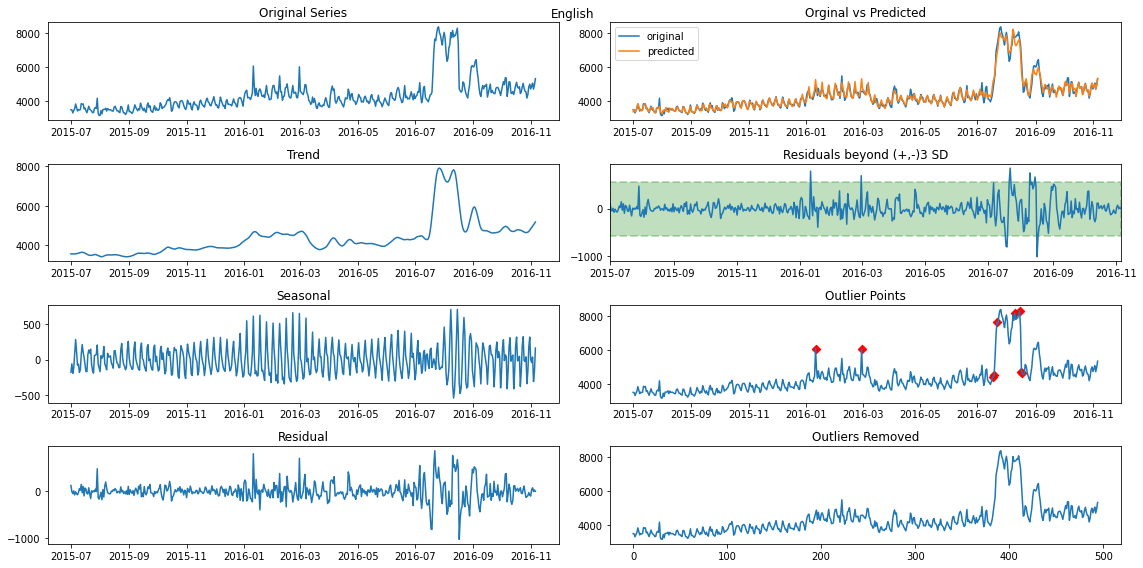

In [ ]:
decompose_and_detect_outlier(english,'English', show_graphs = True)

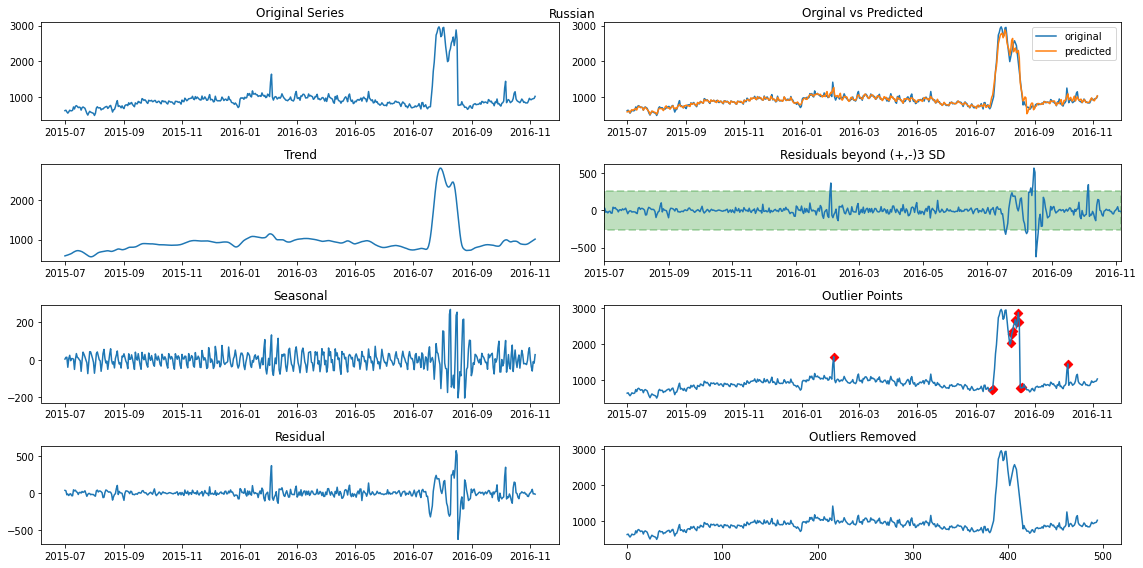

In [ ]:
decompose_and_detect_outlier(russian,'Russian', show_graphs = True)

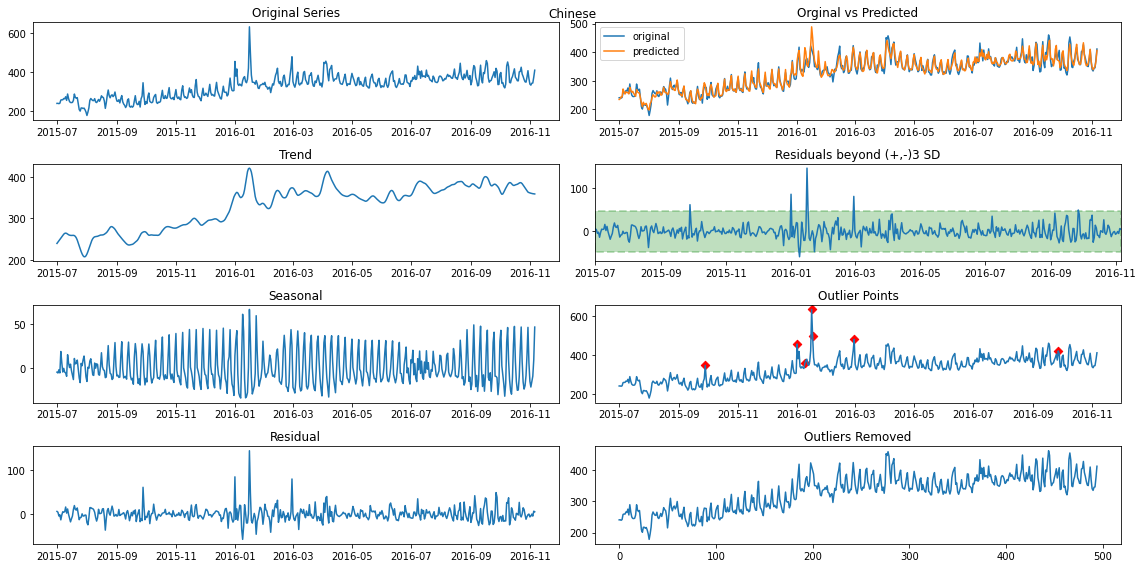

In [ ]:
decompose_and_detect_outlier(chinese,'Chinese', show_graphs = True)

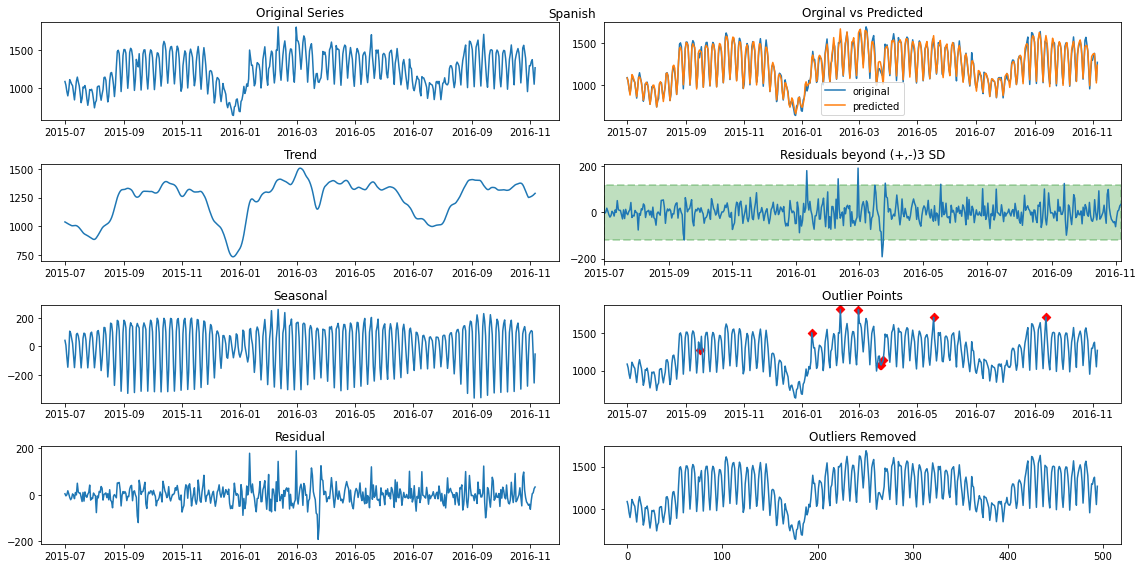

In [ ]:
decompose_and_detect_outlier(spanish, "Spanish", show_graphs = True)

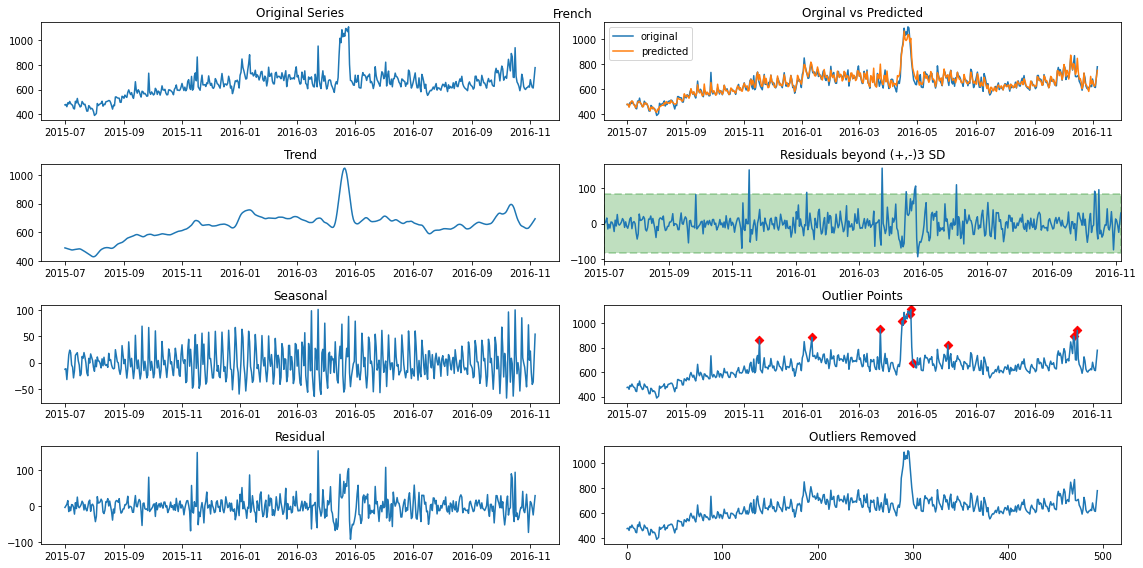

In [ ]:
decompose_and_detect_outlier(french, "French", show_graphs = True)

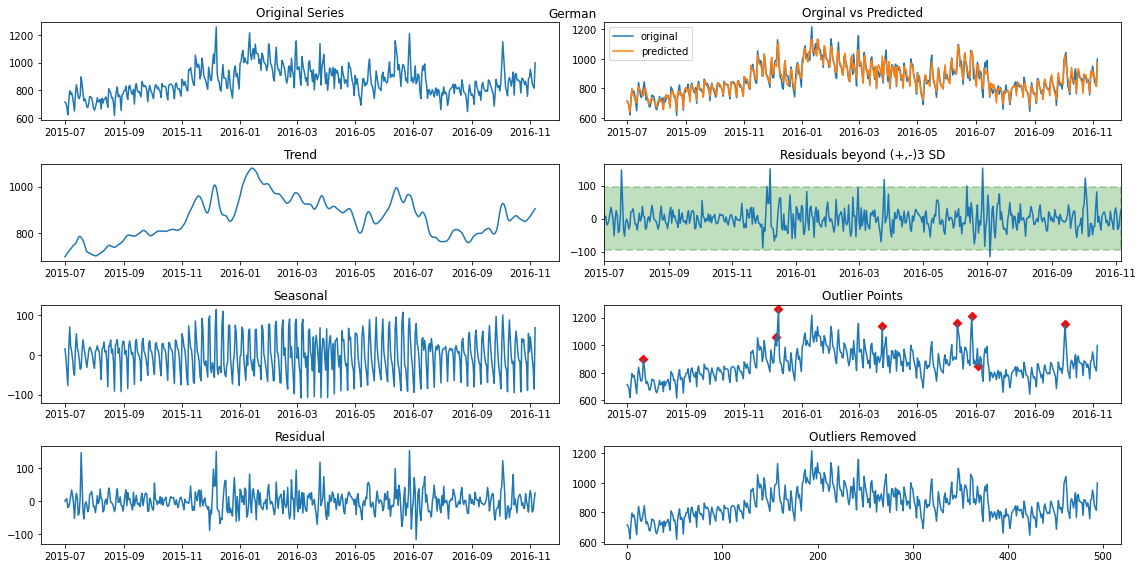

In [ ]:
decompose_and_detect_outlier(german, "German", show_graphs = True)

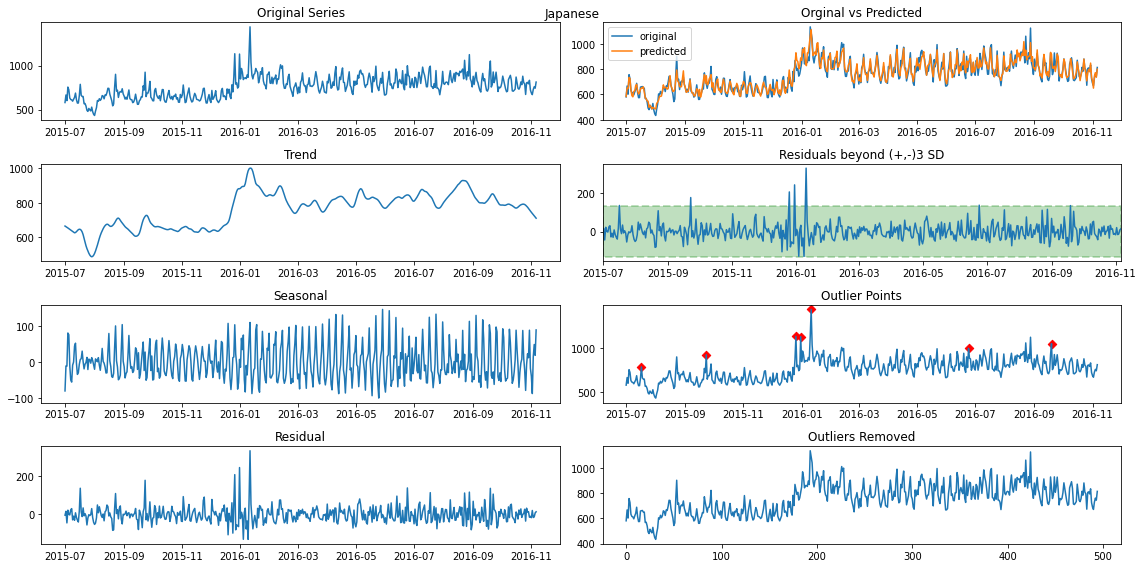

In [ ]:
decompose_and_detect_outlier(japanese, "Japanese", show_graphs = True)

In [ ]:
def decompose_and_detect_outlier_test(lang_df_test, lang_name, show_graphs = False, decomp_type='STL'):

  if decomp_type != 'STL':
    result = sm.tsa.seasonal_decompose(lang_df_test.set_index('date').views, model='additive')
  else:
    stl = STL(lang_df_test.set_index('date').views)
    result = stl.fit()
    
  seasonal, trend, resid = result.seasonal, result.trend, result.resid

  estimated = trend + seasonal
  
  resid_mu = resid.mean()
  resid_dev = resid.std()

  lower = resid_mu - 3*resid_dev
  upper = resid_mu + 3*resid_dev
  anomalies = lang_df_test.set_index('date').views[(resid < lower) | (resid > upper)]

  lang_temp = lang_df_test.set_index('date').views
  lang_temp[anomalies.index] = np.nan
  lang_temp = pd.DataFrame(lang_temp.astype('float64').interpolate(limit=15))
  lang_temp.reset_index(inplace=True)
  lang_df_test['old_views'] = lang_df_test['views']
  lang_df_test['views'] = lang_temp['views'].values

  if show_graphs == True:
    fig, ax = plt.subplots(4,2,figsize=(16, 8))

    ax[0][0].plot(lang_df_test.set_index('date').old_views)
    ax[0][0].set_title('Original Series')

    ax[1][0].plot(trend)
    ax[1][0].set_title('Trend')

    ax[2][0].plot(seasonal)
    ax[2][0].set_title('Seasonal')

    ax[3][0].plot(resid)
    ax[3][0].set_title('Residual')

    ax[0][1].plot(lang_df_test.set_index('date').views, label='original')
    ax[0][1].plot(estimated, label = 'predicted')
    ax[0][1].set_title("Orginal vs Predicted")
    ax[0][1].legend()

    ax[1][1].plot(resid)
    ax[1][1].fill_between([datetime(2016,11,7), datetime(2016,12,31)], lower, upper, color='g', alpha=0.25, linestyle='--', linewidth=2)
    ax[1][1].set_xlim(datetime(2016,11,7), datetime(2016,12,31))
    ax[1][1].set_title("Residuals beyond (+,-)3 SD")

    ax[2][1].plot(lang_df_test.set_index('date').old_views)
    ax[2][1].scatter(anomalies.index, anomalies.values, color='r', marker='D')
    ax[2][1].set_title("Outlier Points")

    ax[3][1].plot(lang_df_test['views'])
    ax[3][1].set_title("Outliers Removed")

    plt.suptitle(lang_name)
    plt.tight_layout()
    plt.show()

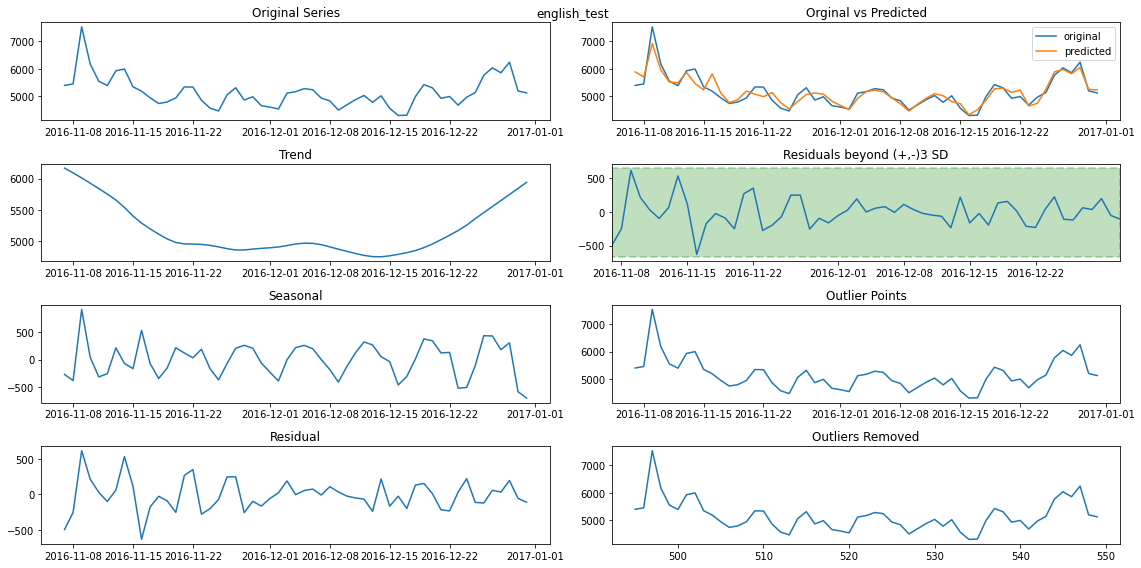

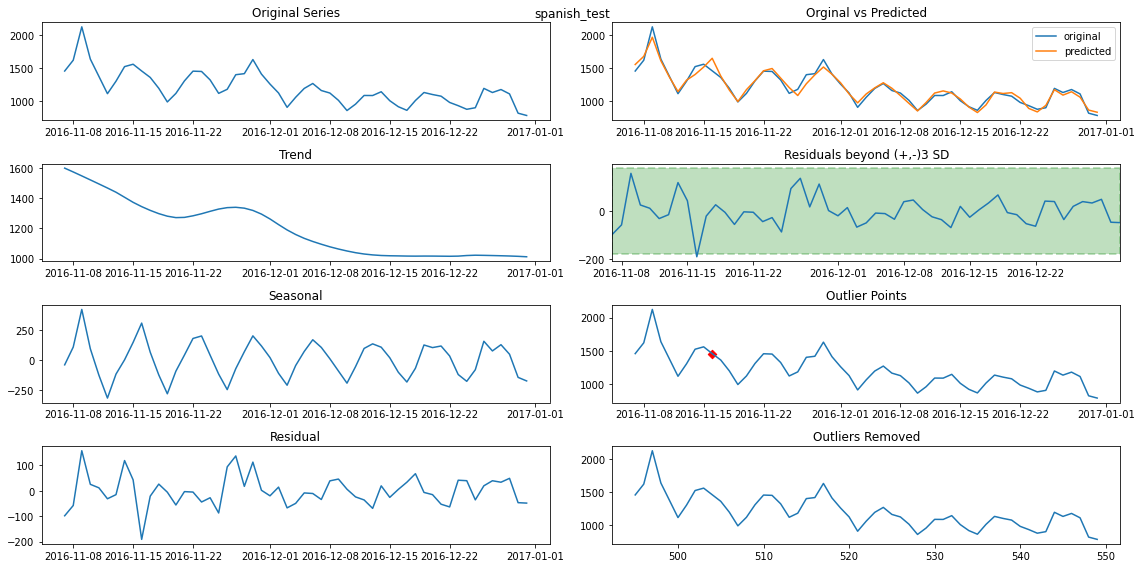

In [ ]:
decompose_and_detect_outlier_test(english_test, "english_test", show_graphs = True)
print("\n\n")
decompose_and_detect_outlier_test(russian_test, "russian_test")
decompose_and_detect_outlier_test(japanese_test, "japanese_test")
decompose_and_detect_outlier_test(chinese_test, "chinese_test")
decompose_and_detect_outlier_test(french_test, "french_test")
decompose_and_detect_outlier_test(german_test, "german_test")
decompose_and_detect_outlier_test(spanish_test, "spanish_test", show_graphs = True)
print("\n\n")

#### Differencing and Identifying the order of differencing (d) for ARIMA model

The first (and most important) step in fitting an ARIMA model is the determination of the order of differencing needed to stationarize the series. Normally, the correct amount of differencing is the lowest order of differencing that yields a time series which fluctuates around a well-defined mean value and whose autocorrelation function (ACF) plot decays fairly rapidly to zero, either from above or below. If the series still exhibits a long-term trend, or otherwise lacks a tendency to return to its mean value, or if its autocorrelations are are positive out to a high number of lags (e.g., 10 or more), then it needs a higher order of differencing.

There are some rules we can follow :

**Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.**

Differencing tends to introduce negative correlation: if the series initially shows strong positive autocorrelation, then a nonseasonal difference will reduce the autocorrelation and perhaps even drive the lag-1 autocorrelation to a negative value. If we apply a second nonseasonal difference (which is occasionally necessary), the lag-1 autocorrelation will be driven even further in the negative direction.
If the lag-1 autocorrelation is zero or even negative, then the series does not need further differencing. 

**Rule 2: If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of  differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.**
A common in ARIMA modeling is to apply an extra order of differencing because the current autocorrelation plot does not show much of a pattern. Another symptom of possible overdifferencing is an increase in the standard deviation, rather than a reduction, when the order of differencing is increased.

**Rule 3: The optimal order of differencing is often the order of differencing at which the standard deviation is lowest.**
We can find the order of differencing that minimizes the standard deviation by fitting ARIMA models with various orders of differencing and no coefficients other than a constant. For example, if we fit an ARIMA(0,0,0) model with constant, an ARIMA(0,1,0) model with constant, and an ARIMA(0,2,0) model with constant, then the RMSE's will be equal to the standard deviations of the original series with 0, 1, and 2 orders of nonseasonal differencing, respectively. The first two rules do not always unambiguously determine the "correct" order of differencing. "Mild underdifferencing" can be compensated for by adding AR terms to the model, while "mild overdifferencing" can be compensated for by adding MA terms instead. In some cases, there may be two different models which fit the data almost equally well: a model that uses 0 or 1 order of differencing together with AR terms, versus a model that uses the next higher order of differencing together with MA terms. In trying to choose between two such models that use different orders of differencing, we may need to ask what assumption we are most comfortable making about the degree of nonstationarity in the original series--i.e., the extent to which it does or doesn't have fixed mean and/or a constant average trend.

**Rule 4**: A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model).

**Rule 5**: A model with no orders of differencing normally includes a constant term (which allows for a non-zero mean value). A model with two orders of total differencing normally does not include a constant term. In a model with one order of total differencing, a constant term should be included if the series has a non-zero average trend.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.arima.model import ARIMA

def get_differencing_order(lang_df, i):
  lang_df = pd.DataFrame(lang_df.set_index('date').views)
  lang_df.index = pd.DatetimeIndex(lang_df.index.values,
                               freq=lang_df.index.inferred_freq)
  for d in range(i+1):
    model = ARIMA(lang_df.views.astype('float64'), order = (0,d,0))
    model = model.fit()
    print(f"Residual Std. Dev After Fitting ARIMA model of order (0,{d},0) : {np.sqrt(model.mse)}")

    fig, ax = plt.subplots(1,3, figsize=(21,3))

    temp = lang_df.views
    for _ in range(d):
      temp = temp.diff()

    ax[0].plot(model.resid) 
    ax[0].set_title(f'Residuals of (0,{d},0)-order ARIMA model') 
    ax[0].axes.xaxis.set_visible(False)

    ax[1].plot(temp) 
    ax[1].set_title(f'Plot of {d}-order differenced Series') 
    ax[1].axes.xaxis.set_visible(False)

    plot_acf(temp.dropna(), ax=ax[2])
    ax[2].set_title(f"Auto-correlation Plot for {d}-order Differenced Series")

Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 961.403385153233
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 321.2128750529924
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 410.1368444496484


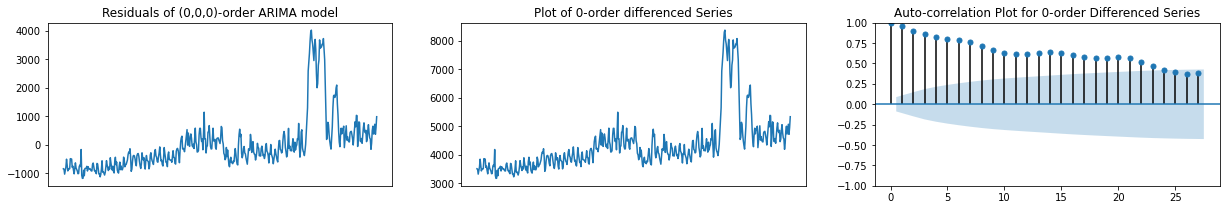

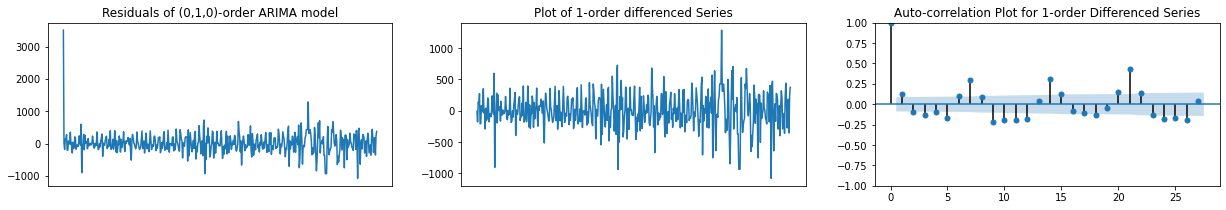

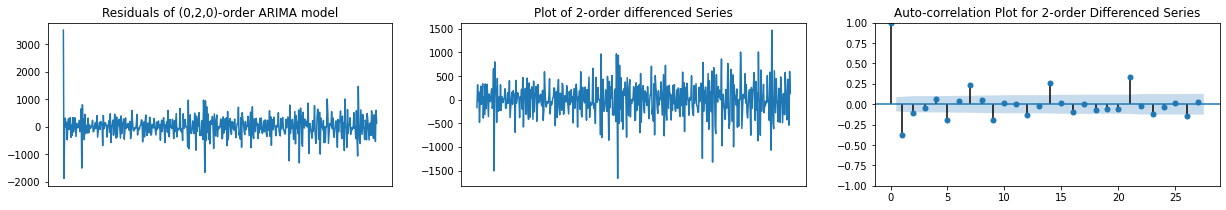

In [ ]:
get_differencing_order(english, 2)

So we see that for d = 1, we get the lowest std-dev for residuals. From d = 2 onwards, there are hints of overdifferencing. Both 1-lag autocorrelation becomes negative (close to or more than 0.5) and the Residual std. dev starts increasing. 

So we choose d = 1 for English Views.

We can verify the same using ADF test.

In [ ]:
ADFTest(english.views.diff().dropna(), 'english')

Language : english
ADF Statistic: -7.305800043876241
p-value: 1.302562120233917e-10

Significance Level : 1%,  Critical Value : -3.4440471158221206
Significance Level : 5%,  Critical Value : -2.867580197120949
Significance Level : 10%,  Critical Value : -2.5699871918402777

Considering significance of 1%, Null rejected. So, time series is stationary.




Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 383.50769850827163
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 88.14366958634464


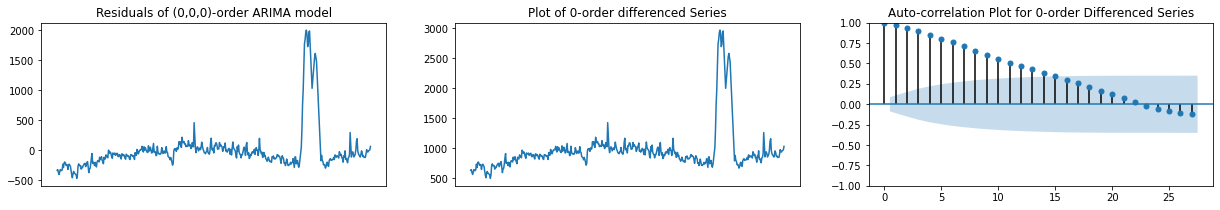

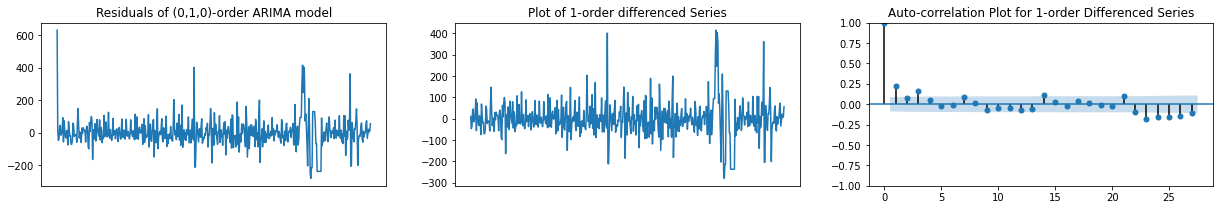

In [ ]:
get_differencing_order(russian, 1)

For Russian we already had a stationary time series to begin with. We can skip the differencing step if we want. 

Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 56.39347607804769
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 27.150965532845998
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 36.442942307740935


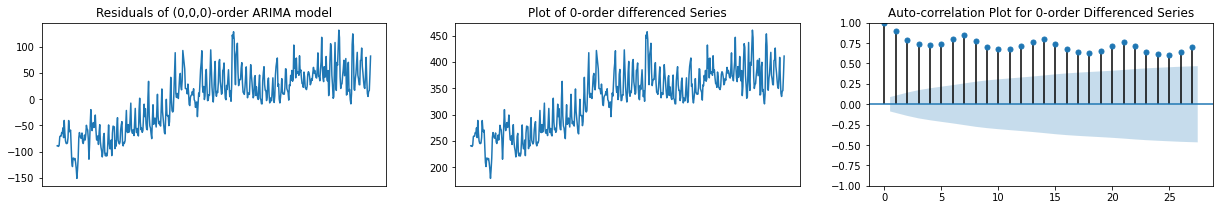

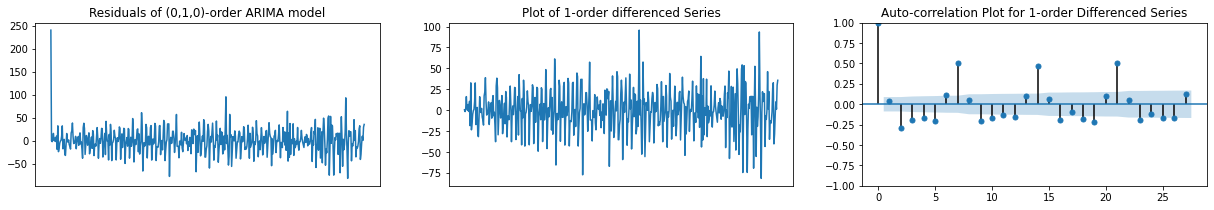

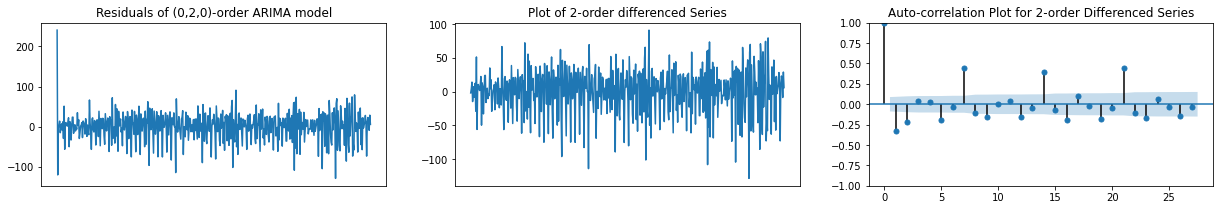

In [ ]:
get_differencing_order(chinese, 2)

In [ ]:
ADFTest(chinese.views.diff().dropna(), 'Chinese')

Language : Chinese
ADF Statistic: -7.214321529386572
p-value: 2.1932435767340223e-10

Significance Level : 1%,  Critical Value : -3.4441920863262863
Significance Level : 5%,  Critical Value : -2.8676439813617147
Significance Level : 10%,  Critical Value : -2.570021186703601

Considering significance of 1%, Null rejected. So, time series is stationary.




Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 117.99241964531859
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 79.76370288012347
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 119.01183813869162


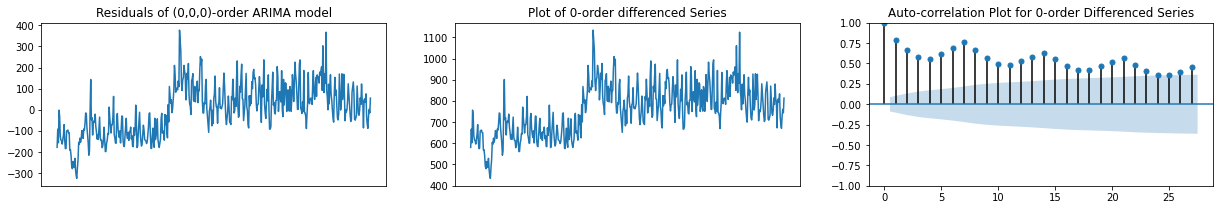

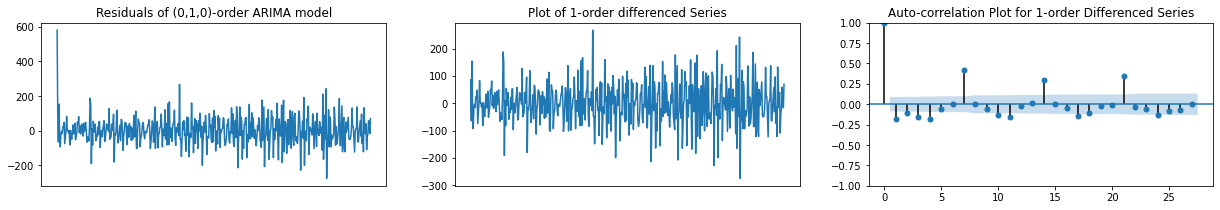

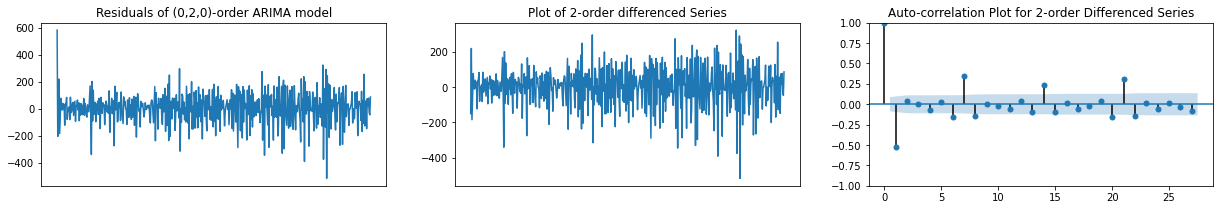

In [ ]:
get_differencing_order(japanese, 2)

In [ ]:
ADFTest(japanese.views.diff().dropna(), 'Japanese')

Language : Japanese
ADF Statistic: -12.563391241653
p-value: 2.0787454308900608e-23

Significance Level : 1%,  Critical Value : -3.443849184997939
Significance Level : 5%,  Critical Value : -2.8674931065091105
Significance Level : 10%,  Critical Value : -2.569940776113236

Considering significance of 1%, Null rejected. So, time series is stationary.




Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 98.87021123679679
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 49.523333582217646
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 69.92759420235981


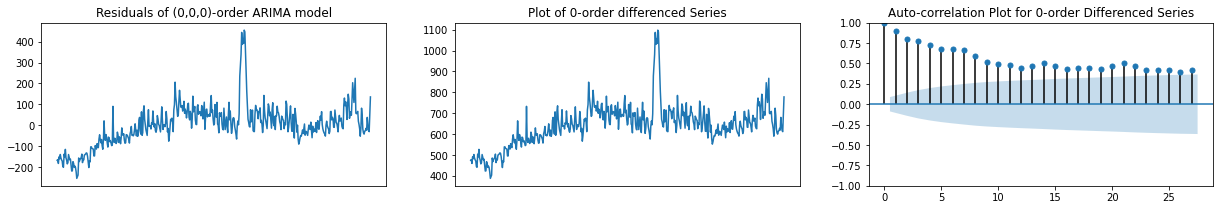

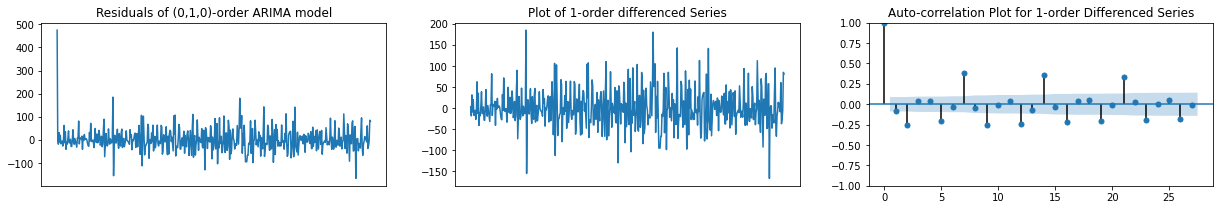

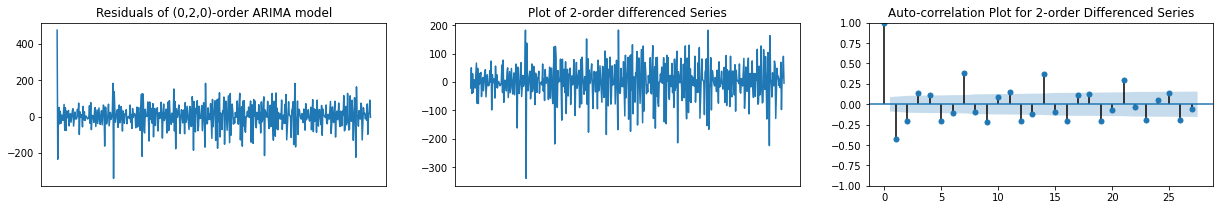

In [ ]:
get_differencing_order(french, 2)

In [ ]:
ADFTest(french.views.diff().dropna(), 'French')

Language : French
ADF Statistic: -7.8479340034496685
p-value: 5.7026012123745115e-12

Significance Level : 1%,  Critical Value : -3.4441920863262863
Significance Level : 5%,  Critical Value : -2.8676439813617147
Significance Level : 10%,  Critical Value : -2.570021186703601

Considering significance of 1%, Null rejected. So, time series is stationary.




Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 101.90381424802243
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 74.7174856483482
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 108.14627585235151


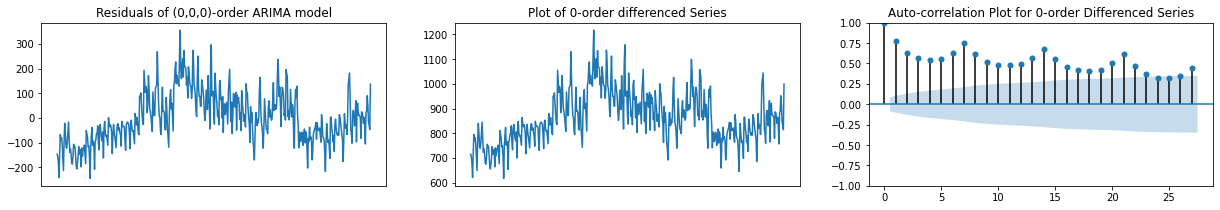

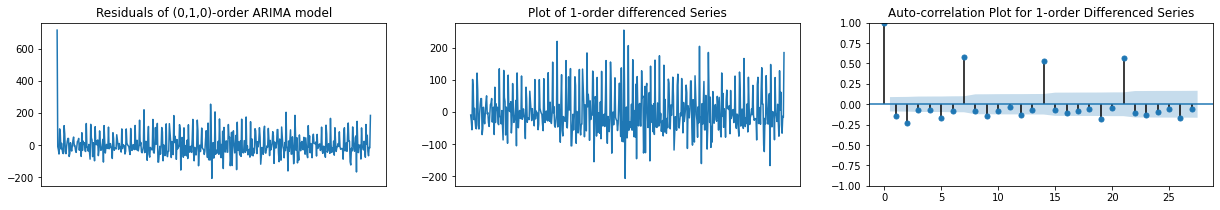

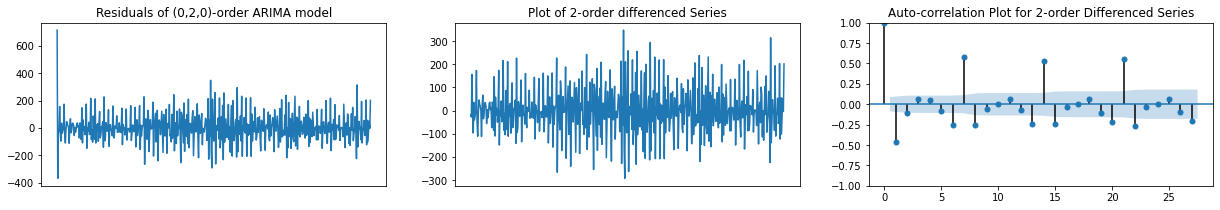

In [ ]:
get_differencing_order(german, 2)

In [ ]:
ADFTest(german.views.diff().dropna(), 'German')

Language : German
ADF Statistic: -6.565737135096723
p-value: 8.16806847190406e-09

Significance Level : 1%,  Critical Value : -3.4441920863262863
Significance Level : 5%,  Critical Value : -2.8676439813617147
Significance Level : 10%,  Critical Value : -2.570021186703601

Considering significance of 1%, Null rejected. So, time series is stationary.




Residual Std. Dev After Fitting ARIMA model of order (0,0,0) : 227.74456968948317
Residual Std. Dev After Fitting ARIMA model of order (0,1,0) : 153.44394965091732
Residual Std. Dev After Fitting ARIMA model of order (0,2,0) : 173.44395996663397


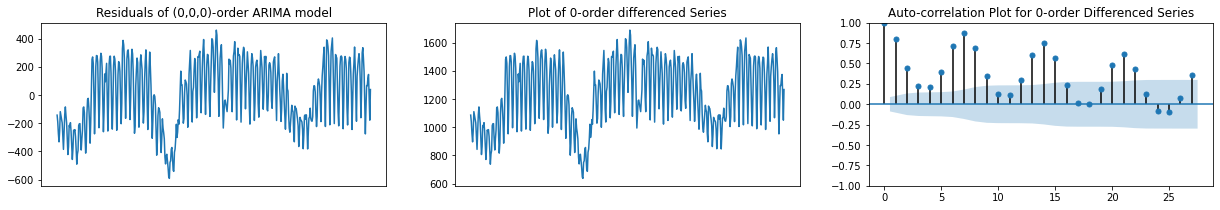

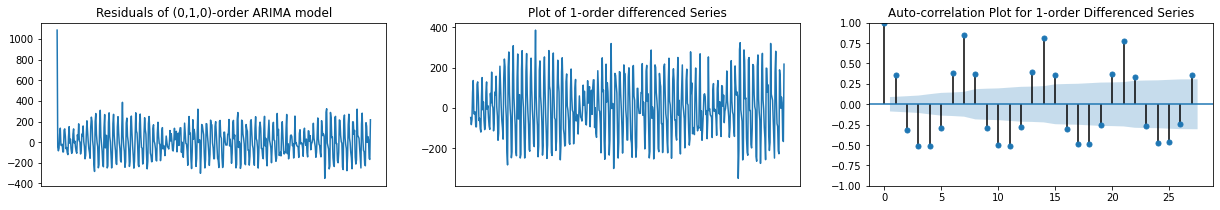

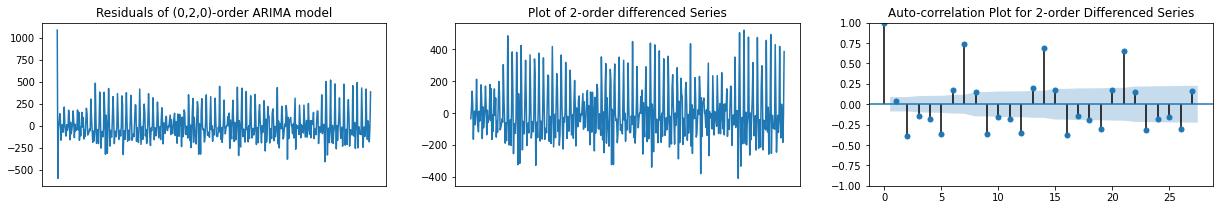

In [ ]:
get_differencing_order(spanish, 2)

In [ ]:
ADFTest(spanish.views.diff().dropna(), 'Spanish')

Language : Spanish
ADF Statistic: -5.21881089120322
p-value: 8.047013975570991e-06

Significance Level : 1%,  Critical Value : -3.4441047380903007
Significance Level : 5%,  Critical Value : -2.867605550172837
Significance Level : 10%,  Critical Value : -2.570000704119326

Considering significance of 1%, Null rejected. So, time series is stationary.




In [ ]:
d_val_dict = {
    'english' : 1,
    'russian' : 0,
    'german' : 1,
    'spanish' : 1,
    'french' : 1,
    'chinese' : 1,
    'japanese' : 1
}

So, we have found out what order of differencing makes our series stationary. We can add a new column corresponding to the differenced values for each series.

In [ ]:
english['diff'] = english.views.diff()
russian['diff'] = russian.views
chinese['diff'] = chinese.views.diff()
japanese['diff'] = japanese.views.diff()
german['diff'] = german.views.diff()
spanish['diff'] = spanish.views.diff()
french['diff'] = french.views.diff()

### Auto-Correlation and Partial Autocorrelation Plots and Identifying (p,q) for ARIMA model and (P,D,Q,m) for SARIMA.

First we will try out Auto ARIMA to get an idea about which p, q values we could use. Thereafter we shall try and see if we can correlate our findings by observing the ACF and PACF plots.

#### Auto ARIMA

In [ ]:
import pmdarima as pmd

def arimamodel(lang_df, d):
    autoarima_model = pmd.auto_arima(lang_df.views, 
                              d = d,
                              start_p=0, 
                              start_q=0,
                              max_p = 7,
                              max_q = 7,
                              test="adf",
                              trace=True)
    return autoarima_model

In [ ]:
arima_params = {
    
}

In [ ]:
english_arima_model = arimamodel(english, 1)
english_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6972.939, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6966.780, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6965.033, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6971.027, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6966.330, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6964.845, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6955.022, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6955.158, Time=1.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6957.020, Time=0.52 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=6953.146, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6962.926, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=6953.360, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=6

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3471.918
Date:                Mon, 19 Sep 2022   AIC                           6951.835
Time:                        13:54:02   BIC                           6968.645
Sample:                             0   HQIC                          6958.435
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.062     15.316      0.000       0.829       1.072
ar.L2         -0.2080      0.042     -4.971      0.000      -0.290      -0.126
ma.L1         -0.8381      0.065    -12.855      0.000      -0.966      -0.710
sigma2      7.539e+04   3454.488     21.823      0.000    6.86e+04    8.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               109.69
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = english_arima_model.get_params()['order']
arima_params['english'] = {'p':p, 'd':d, 'q':q}

In [ ]:
russian_arima_model = arimamodel(russian, 0)
russian_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7298.615, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5788.527, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6721.342, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8281.143, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5760.309, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5761.469, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5755.431, Time=0.58 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5762.064, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5762.055, Time=0.92 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5753.210, Time=0.96 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5763.875, Time=0.65 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5750.990, Time=1.16 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=5749.841, Time=1.30 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=5750.459, Time=0.50 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(4, 0, 3)   Log Likelihood               -2862.349
Date:                Mon, 19 Sep 2022   AIC                           5742.698
Time:                        13:54:23   BIC                           5780.539
Sample:                             0   HQIC                          5757.553
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     35.1171      9.765      3.596      0.000      15.977      54.257
ar.L1          1.2976      0.060     21.629      0.000       1.180       1.415
ar.L2         -0.9517      0.045    -21.004      0.000      -1.041      -0.863
ar.L3          1.3658      0.053     25.904      0.000       1.262       1.469
ar.L4         -0.7484      0.063    -11.806      0.000      -0.873      -0.624
ma.L1         -0.1247      0.076     -1.648      0.099      -0.273       0.024
ma.L2          0.6648      0.050     13.429      0.000       0.568       0.762
ma.L3         -0.5499      0.087     -6.321      0.000      -0.720      -0.379
sigma2      6299.9540    256.396     24.571      0.000    5797.426    6802.482
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):               470.02
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = russian_arima_model.get_params()['order']
arima_params['russian'] = {'p':p, 'd':d, 'q':q}

In [ ]:
chinese_arima_model = arimamodel(chinese, 1)
chinese_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4583.229, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4584.234, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4583.058, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4581.324, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4501.106, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4451.097, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4543.415, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4452.147, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4448.106, Time=1.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4459.843, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4452.842, Time=0.76 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4404.912, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4457.616, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4367.901, Time=1.56 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -2172.415
Date:                Mon, 19 Sep 2022   AIC                           4358.830
Time:                        13:54:52   BIC                           4388.248
Sample:                             0   HQIC                          4370.380
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2422      0.006    200.687      0.000       1.230       1.254
ar.L2         -0.9942      0.006   -158.464      0.000      -1.007      -0.982
ma.L1         -1.5322      0.040    -38.560      0.000      -1.610      -1.454
ma.L2          0.9685      0.080     12.102      0.000       0.812       1.125
ma.L3          0.1388      0.081      1.721      0.085      -0.019       0.297
ma.L4         -0.3434      0.041     -8.368      0.000      -0.424      -0.263
sigma2       376.4019     21.942     17.154      0.000     333.395     419.408
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 9.57
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               1.57   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = chinese_arima_model.get_params()['order']
arima_params['chinese'] = {'p':p, 'd':d, 'q':q}

In [ ]:
japanese_arima_model = arimamodel(japanese, 1)
japanese_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5677.470, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5662.946, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5645.743, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5675.490, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5575.076, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5569.987, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5653.732, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5552.922, Time=0.62 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5632.449, Time=0.34 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5530.394, Time=0.85 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5582.167, Time=0.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5518.024, Time=0.75 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=5538.651, Time=0.24 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=5475.695, Time=1.64 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(7, 1, 0)   Log Likelihood               -2726.590
Date:                Mon, 19 Sep 2022   AIC                           5469.180
Time:                        13:55:01   BIC                           5502.800
Sample:                             0   HQIC                          5482.379
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4460      0.043    -10.343      0.000      -0.531      -0.362
ar.L2         -0.4045      0.047     -8.536      0.000      -0.497      -0.312
ar.L3         -0.3990      0.051     -7.802      0.000      -0.499      -0.299
ar.L4         -0.4376      0.048     -9.198      0.000      -0.531      -0.344
ar.L5         -0.3458      0.052     -6.597      0.000      -0.449      -0.243
ar.L6         -0.2407      0.046     -5.233      0.000      -0.331      -0.151
ar.L7          0.1757      0.052      3.405      0.001       0.075       0.277
sigma2      3630.4494    207.047     17.534      0.000    3224.644    4036.255
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                32.04
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.60   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = japanese_arima_model.get_params()['order']
arima_params['japanese'] = {'p':p, 'd':d, 'q':q}

In [ ]:
german_arima_model = arimamodel(german, 1)
german_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5567.779, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5558.518, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5532.588, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5565.815, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5461.991, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5448.017, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5526.357, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5447.739, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5513.563, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=5437.319, Time=1.01 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=5495.685, Time=0.18 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=5406.417, Time=1.16 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=5435.758, Time=0.74 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=5295.239, Time=3.05 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(7, 1, 0)   Log Likelihood               -2632.390
Date:                Mon, 19 Sep 2022   AIC                           5280.781
Time:                        13:55:16   BIC                           5314.401
Sample:                             0   HQIC                          5293.980
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3350      0.038     -8.922      0.000      -0.409      -0.261
ar.L2         -0.3732      0.040     -9.296      0.000      -0.452      -0.295
ar.L3         -0.3158      0.039     -8.001      0.000      -0.393      -0.238
ar.L4         -0.3024      0.044     -6.824      0.000      -0.389      -0.216
ar.L5         -0.2957      0.042     -7.101      0.000      -0.377      -0.214
ar.L6         -0.2490      0.038     -6.598      0.000      -0.323      -0.175
ar.L7          0.3504      0.036      9.693      0.000       0.280       0.421
sigma2      2484.2554    156.906     15.833      0.000    2176.725    2791.786
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.81   Prob(JB):                         0.06
Heteroskedasticity (H):               1.49   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = german_arima_model.get_params()['order']
arima_params['german'] = {'p':p, 'd':d, 'q':q}

In [ ]:
french_arima_model = arimamodel(french, 1)
french_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5160.787, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5159.108, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5155.251, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5158.880, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5123.444, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5127.401, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5124.864, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5122.944, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5124.861, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5126.725, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5121.133, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5153.375, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5123.057, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=5123.054, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2557.567
Date:                Mon, 19 Sep 2022   AIC                           5121.133
Time:                        13:55:19   BIC                           5133.741
Sample:                             0   HQIC                          5126.083
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1308      0.034     -3.804      0.000      -0.198      -0.063
ma.L2         -0.2712      0.039     -6.913      0.000      -0.348      -0.194
sigma2      1837.6252     84.215     21.821      0.000    1672.566    2002.684
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                99.06
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = french_arima_model.get_params()['order']
arima_params['french'] = {'p':p, 'd':d, 'q':q}

In [ ]:
spanish_arima_model = arimamodel(spanish, 1)
spanish_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6327.141, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6260.296, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6178.399, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6325.144, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6180.328, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6132.660, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6070.173, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5804.986, Time=1.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5947.483, Time=0.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5783.420, Time=1.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6031.830, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5789.519, Time=1.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=5751.063, Time=1.70 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  495
Model:               SARIMAX(5, 1, 6)   Log Likelihood               -2749.766
Date:                Mon, 19 Sep 2022   AIC                           5523.533
Time:                        13:56:28   BIC                           5573.963
Sample:                             0   HQIC                          5543.332
                                - 495                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1742      0.039     -4.454      0.000      -0.251      -0.098
ar.L2         -0.6552      0.032    -20.253      0.000      -0.719      -0.592
ar.L3         -0.6036      0.054    -11.249      0.000      -0.709      -0.498
ar.L4         -0.2151      0.031     -6.904      0.000      -0.276      -0.154
ar.L5         -0.9567      0.038    -25.164      0.000      -1.031      -0.882
ma.L1          0.0592      0.052      1.134      0.257      -0.043       0.161
ma.L2          0.4092      0.044      9.327      0.000       0.323       0.495
ma.L3          0.3917      0.053      7.349      0.000       0.287       0.496
ma.L4         -0.1168      0.047     -2.470      0.013      -0.209      -0.024
ma.L5          0.6385      0.039     16.576      0.000       0.563       0.714
ma.L6         -0.1392      0.044     -3.181      0.001      -0.225      -0.053
sigma2      4176.6681    264.032     15.819      0.000    3659.175    4694.162
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.56
Prob(Q):                              0.88   Prob(JB):                         0.06
Heteroskedasticity (H):               1.79   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
p,d,q = spanish_arima_model.get_params()['order']
arima_params['spanish'] = {'p':p, 'd':d, 'q':q}

In [ ]:
arima_params

{'english': {'p': 2, 'd': 1, 'q': 1},
 'russian': {'p': 4, 'd': 0, 'q': 3},
 'chinese': {'p': 2, 'd': 1, 'q': 4},
 'japanese': {'p': 7, 'd': 1, 'q': 0},
 'german': {'p': 7, 'd': 1, 'q': 0},
 'french': {'p': 0, 'd': 1, 'q': 2},
 'spanish': {'p': 5, 'd': 1, 'q': 6}}

#### ACF and PACF plots

In [ ]:
def plot_acf_pacf(lang_df, lang_name, arima_params_dict=None, lag_val = 30):

  fig, ax = plt.subplots(1,2, figsize=(20,4))
  if arima_params_dict is None:
    d = 0
    p = 'NA'
    q = 'NA'
  else:
    p = arima_params_dict[lang_name]['p']
    d = arima_params_dict[lang_name]['d']
    q = arima_params_dict[lang_name]['q']

  
  temp = lang_df.views
  for k in range(d):
    temp = temp.diff()

  plot_acf(temp.dropna(), ax=ax[0], lags = lag_val)
  ax[0].set_title(f"Auto-correlation Plot for {lang_name}, Auto-ARIMA (p,d,q) = ({p},{d},{q})")

  plot_pacf(temp.dropna(), ax=ax[1], lags = lag_val)
  ax[1].set_title(f"Partial Auto-correlation Plot for {lang_name}, Auto-ARIMA (p,d,q) = ({p},{d},{q})")
  
  plt.suptitle(lang_name)
  plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


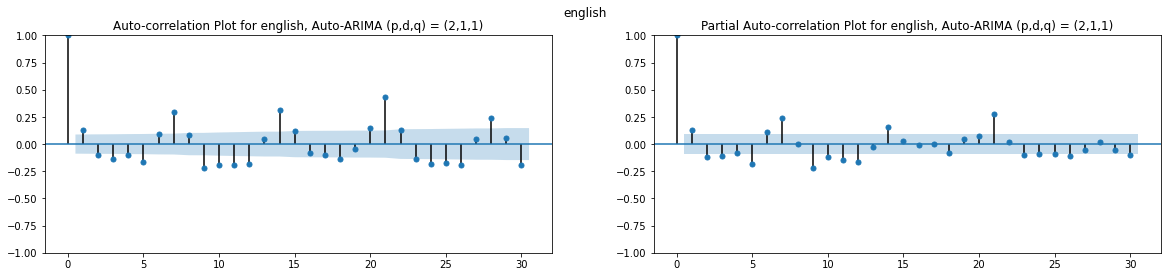

In [ ]:
plot_acf_pacf(english, 'english', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


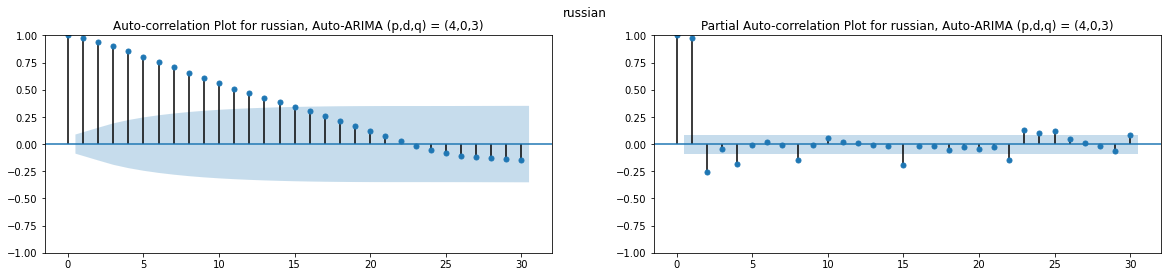

In [ ]:
plot_acf_pacf(russian, 'russian', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


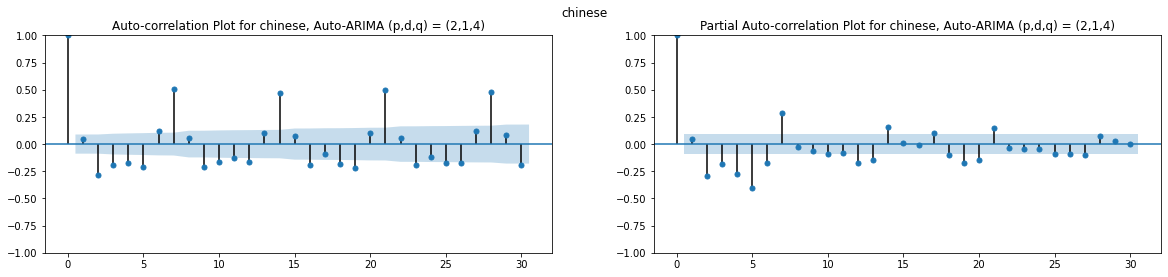

In [ ]:
plot_acf_pacf(chinese, 'chinese', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


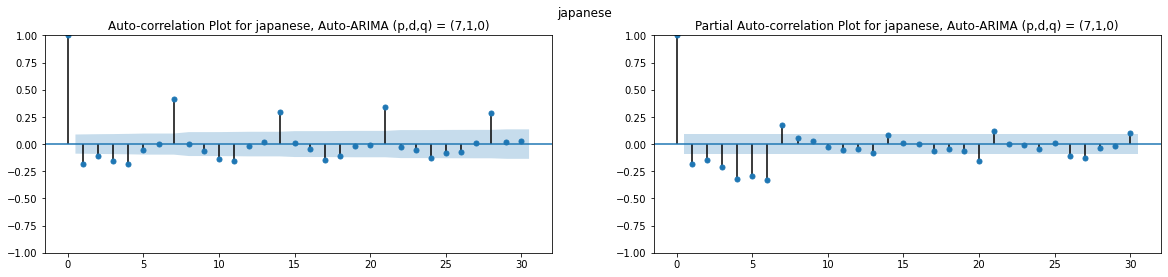

In [ ]:
plot_acf_pacf(japanese, 'japanese', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


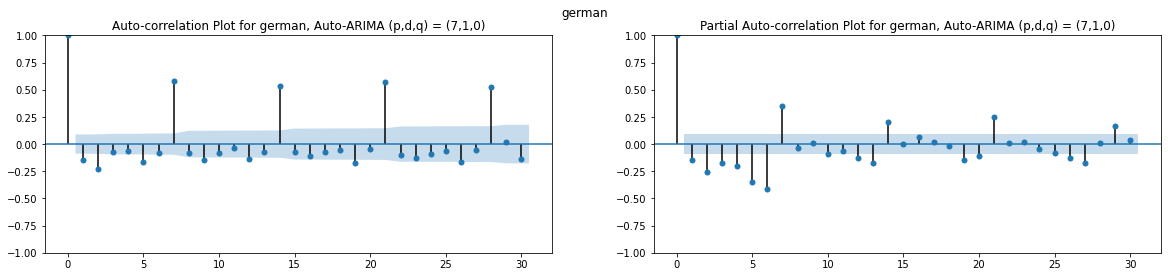

In [ ]:
plot_acf_pacf(german, 'german', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


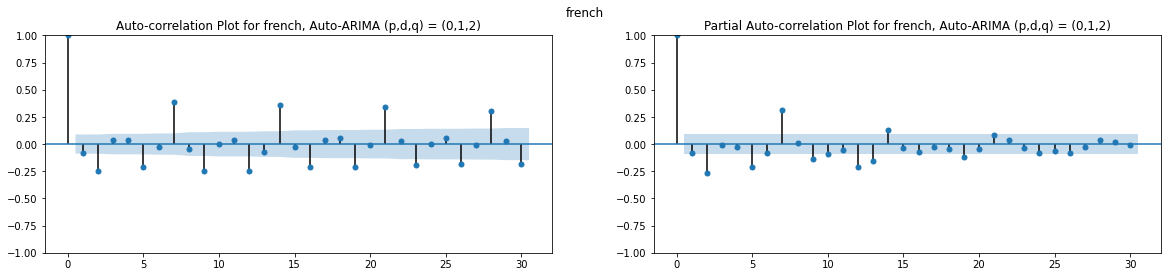

In [ ]:
plot_acf_pacf(french, 'french', arima_params)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


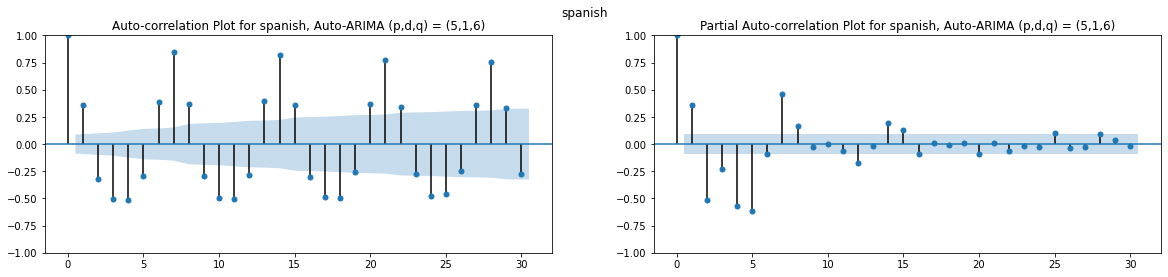

In [ ]:
plot_acf_pacf(spanish, 'spanish', arima_params)

#### SARIMA parameters (P,D,Q,m)

Next, we will try to find the seasonality m first. Thereafter, we will try to estimate the deasonal differencing parameter D, and SARIMA parameters P, Q using Auto ARIMA (with seasonal set to True).

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX 

#### ACF, PACF plots for undifferenced series - To get idea about 'm'

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


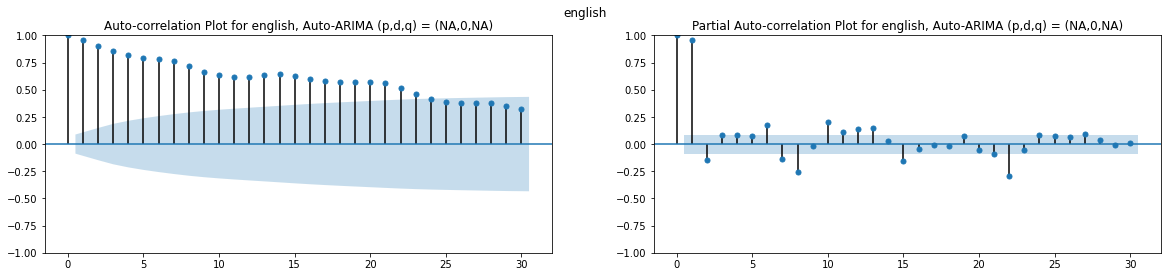

In [ ]:
plot_acf_pacf(english, 'english')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


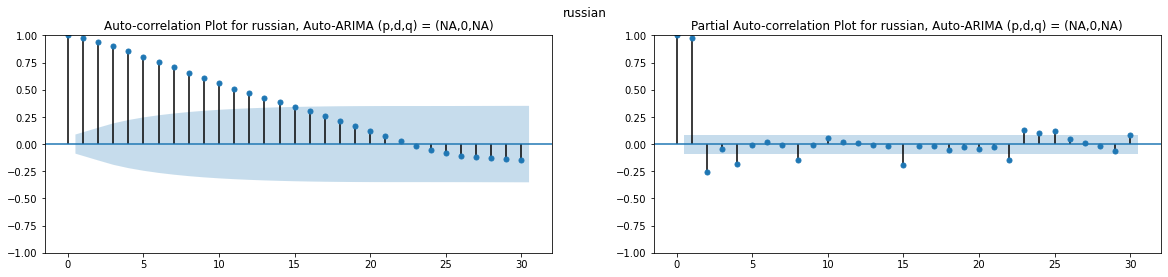

In [ ]:
plot_acf_pacf(russian, 'russian')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


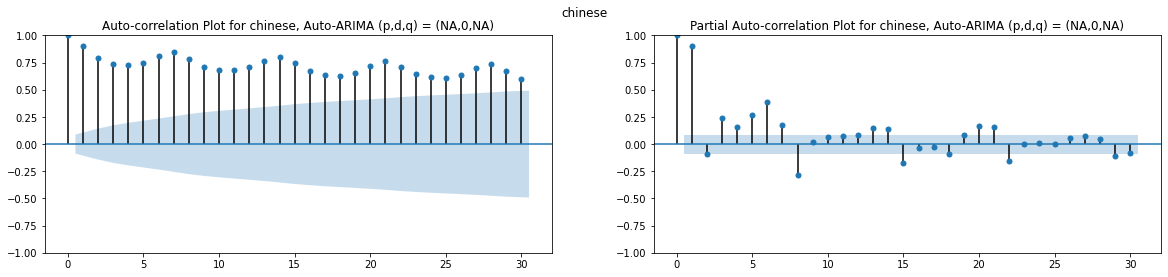

In [ ]:
plot_acf_pacf(chinese, 'chinese')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


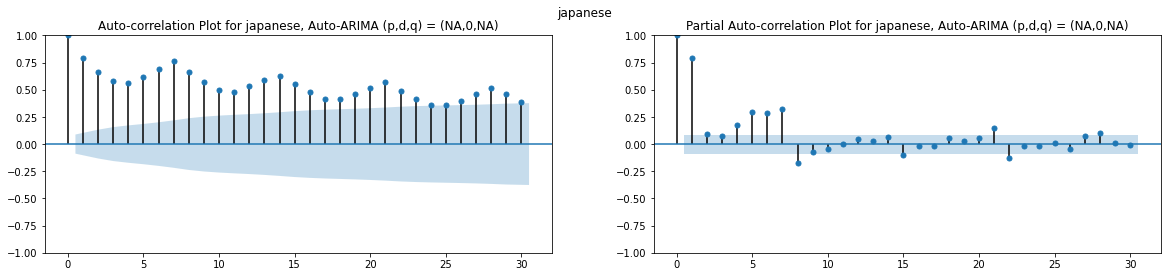

In [ ]:
plot_acf_pacf(japanese, 'japanese')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


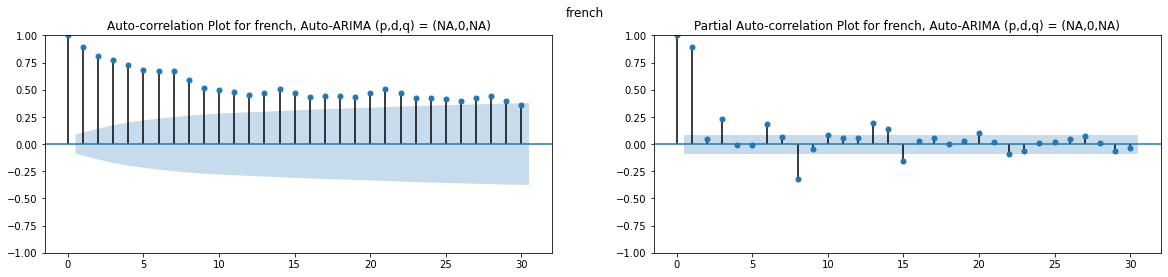

In [ ]:
plot_acf_pacf(french, 'french')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


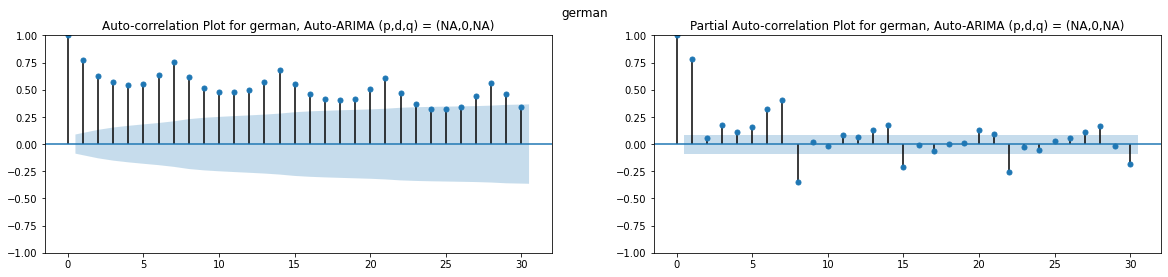

In [ ]:
plot_acf_pacf(german, 'german')

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


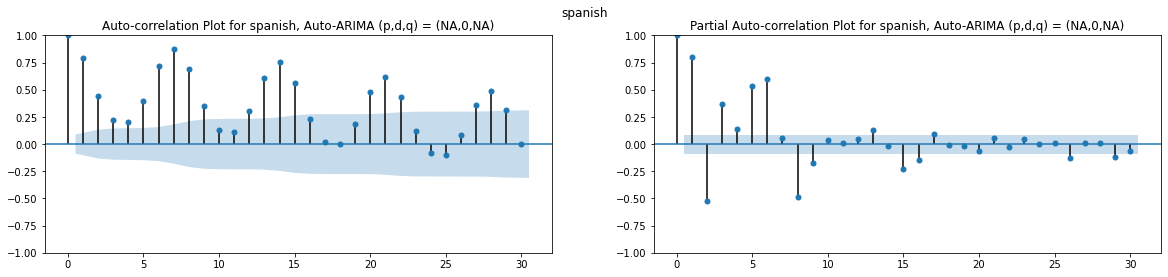

In [ ]:
plot_acf_pacf(spanish, 'spanish')

It seems there is some weekly seasonality. We can take m = 7 for the SARIMA models.

#### Estimating D

We can use a Canova-Hansen test to estimate our seasonal differencing term.

In [ ]:
from pmdarima.arima.utils import nsdiffs

# estimate number of seasonal differences using a Canova-Hansen test

def est_D(lang_df, lang_name, m=7):
  D = nsdiffs(lang_df.views.dropna(),
              m=7,  
              max_D=12,
              test='ch')
  print(f"D for {lang_name} is {D}")
  return D

In [ ]:
eng_D = est_D(english,'english')
rus_D = est_D(russian,'russian')
jap_D = est_D(japanese,'japanese')
chi_D = est_D(chinese,'chinese')
ger_D = est_D(german,'german')
fre_D = est_D(french,'french')
spa_D = est_D(spanish,'spanish')

D for english is 0
D for russian is 0
D for japanese is 0
D for chinese is 0
D for german is 0
D for french is 0
D for spanish is 0


#### Estimating P, Q - Auto SARIMA 

In [ ]:
def sarimamodel(lang_df, d, m):
    autoarima_model = pmd.auto_arima(lang_df.views.dropna(), 
                              d = d,
                              m = m,
                              seasonal = True,
                              start_p=0, 
                              start_q=0,
                              max_p = 4,
                              max_q = 4,
                              start_P=0, 
                              start_Q=0,
                              max_P = 4,
                              max_Q = 4,
                              test="adf",
                              trace=True)
    return autoarima_model

In [ ]:
eng_sar = sarimamodel(english, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6972.939, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6927.705, Time=0.43 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6939.533, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6971.027, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=6966.780, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=6899.053, Time=0.95 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=6842.754, Time=2.09 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=6843.412, Time=3.56 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=6802.276, Time=5.62 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.70 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=9.72 sec
 ARIMA(1,1,0)(3,0,2)[7] intercept   : AIC=6795.305, Time=6.62 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(1,1,0)(4,0,2)[7] intercept   : AIC=inf, Time=10.32 sec
 ARIMA(1,1,0)(3,0,3)[7] intercept   : AIC=6808.305, 

In [ ]:
sarimax_params = {}

p,d,q = eng_sar.get_params()['order']
P,D,Q,m = eng_sar.get_params()['seasonal_order']
sarimax_params['english'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
rus_sar = sarimamodel(russian, 0, 7)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=7298.615, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=5785.274, Time=0.49 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=6540.962, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=8281.143, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5788.527, Time=0.19 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=5781.999, Time=1.82 sec
 ARIMA(1,0,0)(3,0,0)[7] intercept   : AIC=5781.168, Time=3.99 sec
 ARIMA(1,0,0)(4,0,0)[7] intercept   : AIC=5782.684, Time=8.65 sec
 ARIMA(1,0,0)(3,0,1)[7] intercept   : AIC=5782.345, Time=3.48 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=5778.904, Time=2.72 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=5764.697, Time=1.42 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5786.195, Time=0.40 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=5778.022, Time=2.79 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=5783.077, Time=1.48 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept

In [ ]:
p,d,q = rus_sar.get_params()['order']
P,D,Q,m = rus_sar.get_params()['seasonal_order']
sarimax_params['russian'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
jap_sar = sarimamodel(japanese, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5677.470, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5550.531, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5556.045, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5675.490, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5662.946, Time=0.11 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5539.989, Time=0.76 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=5517.521, Time=1.86 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=5515.037, Time=2.91 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=5466.540, Time=8.68 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=5466.458, Time=5.61 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=3.15 sec
 ARIMA(1,1,0)(3,0,2)[7] intercept   : AIC=inf, Time=6.64 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=5463.150, Time=2.50 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,1,0)(2,0,3)[7] intercept   : AIC=inf, T

In [ ]:
p,d,q = jap_sar.get_params()['order']
P,D,Q,m = jap_sar.get_params()['seasonal_order']
sarimax_params['japanese'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
chi_sar = sarimamodel(chinese, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4583.229, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4436.191, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4493.644, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4581.324, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4584.234, Time=0.10 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=4393.317, Time=0.88 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=4354.838, Time=3.10 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=4338.399, Time=3.57 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=11.19 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=9.31 sec
 ARIMA(0,1,0)(4,0,0)[7] intercept   : AIC=4340.290, Time=5.60 sec
 ARIMA(2,1,0)(4,0,0)[7] intercept   : AIC=4319.696, Time=6.30 sec
 ARIMA(2,1,0)(3,0,0)[7] intercept   : AIC=4338.069, Time=2.49 sec
 ARIMA(2,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=10.68 sec
 ARIMA(2,1,0)(3,0,1)[7] intercept   : AIC=inf,

In [ ]:
p,d,q = chi_sar.get_params()['order']
P,D,Q,m = chi_sar.get_params()['seasonal_order']
sarimax_params['chinese'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
ger_sar = sarimamodel(german, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5567.779, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5349.792, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5423.741, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5565.815, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5558.518, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5302.098, Time=0.94 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=5256.436, Time=1.68 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=inf, Time=2.96 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=8.11 sec
 ARIMA(0,1,0)(3,0,0)[7] intercept   : AIC=5268.652, Time=1.25 sec
 ARIMA(2,1,0)(3,0,0)[7] intercept   : AIC=5231.834, Time=2.77 sec
 ARIMA(2,1,0)(2,0,0)[7] intercept   : AIC=5274.853, Time=1.18 sec
 ARIMA(2,1,0)(4,0,0)[7] intercept   : AIC=inf, Time=3

In [ ]:
p,d,q = ger_sar.get_params()['order']
P,D,Q,m = ger_sar.get_params()['seasonal_order']
sarimax_params['german'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
fre_sar = sarimamodel(french, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=5160.787, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5081.487, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5105.900, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=5158.880, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=5159.108, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=5052.145, Time=1.02 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=5037.083, Time=2.29 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=5033.064, Time=3.64 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=12.15 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=5.11 sec
 ARIMA(0,1,0)(4,0,0)[7] intercept   : AIC=5036.672, Time=3.14 sec
 ARIMA(2,1,0)(4,0,0)[7] intercept   : AIC=5029.229, Time=4.96 sec
 ARIMA(2,1,0)(3,0,0)[7] intercept   : AIC=5033.553, Time=2.47 sec
 ARIMA(2,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=11.09 sec
 ARIMA(2,1,0)(3,0,1)[7] intercept   : AIC=inf,

In [ ]:
p,d,q = fre_sar.get_params()['order']
P,D,Q,m = fre_sar.get_params()['seasonal_order']
sarimax_params['french'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

In [ ]:
spa_sar = sarimamodel(spanish, 1, 7)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6327.141, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5684.911, Time=0.57 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5986.818, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6325.144, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=6260.296, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=5591.493, Time=1.26 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=6016.835, Time=0.41 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.61 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=5592.001, Time=2.14 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=5871.378, Time=0.89 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=5590.825, Time=0.81 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=6043.636, Time=0.32 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=5686.3

In [ ]:
p,d,q = spa_sar.get_params()['order']
P,D,Q,m = spa_sar.get_params()['seasonal_order']
sarimax_params['spanish'] = {'p':p,'d':d,'q':q,'P':P,'D':D,'Q':Q,'m':m}

### Modeling and Forecasting

#### ARIMA

In [ ]:
arima_params

{'english': {'p': 2, 'd': 1, 'q': 1},
 'russian': {'p': 4, 'd': 0, 'q': 3},
 'chinese': {'p': 2, 'd': 1, 'q': 4},
 'japanese': {'p': 7, 'd': 1, 'q': 0},
 'german': {'p': 7, 'd': 1, 'q': 0},
 'french': {'p': 0, 'd': 1, 'q': 2},
 'spanish': {'p': 5, 'd': 1, 'q': 6}}

In [ ]:
hand_tune_arima_params = {
    'english': {'p': 2, 'd': 1, 'q': 3},
    'russian': {'p': 4, 'd': 0, 'q': 0},
    'chinese': {'p': 7, 'd': 1, 'q': 7},
    'japanese': {'p': 7, 'd': 1, 'q': 1},
    'german': {'p': 7, 'd': 1, 'q': 0},
    'french': {'p': 0, 'd': 1, 'q': 2},
    'spanish': {'p': 2, 'd': 1, 'q': 7}
}

In [ ]:

def get_arima_result(lang_df, lang_df_test, lang_name, arima_params):

  p = arima_params[lang_name]['p']
  d = arima_params[lang_name]['d']
  q = arima_params[lang_name]['q']
  plt.figure(figsize=(16,4))

  model = ARIMA(lang_df.views.astype('float64'), order = (p,d,q))
  model = model.fit()
  lang_df_test['pred'] = model.forecast(steps=55)

  total = pd.DataFrame(lang_df['views'].append(lang_df_test['views']))
  total['pred'] = list(model.predict()) + list(model.forecast(steps=55))
  
  plt.plot(total[1:]['views'])
  plt.plot(total[1:]['pred'])
  #lang_df_test[['views','pred']].plot(style = '-o')
  mape = mean_absolute_percentage_error(lang_df_test['views'], lang_df_test['pred'])
  print(f"MAPE: {mape*100}%")
  return mape
  plt.show()

In [ ]:

result_mape_df = {
    'arima': {'english':0, 'russian':0, 'chinese':0, 'japanese':0, 'german':0, 'french':0, 'spanish':0},
    'sarima': {'english':0, 'russian':0, 'chinese':0, 'japanese':0, 'german':0, 'french':0, 'spanish':0},
    'sarimax': {'english':0, 'russian':0, 'chinese':0, 'japanese':0, 'german':0, 'french':0, 'spanish':0},
    'regression': {'english':0, 'russian':0, 'chinese':0, 'japanese':0, 'german':0, 'french':0, 'spanish':0},
    'prophet': {'english':0, 'russian':0, 'chinese':0, 'japanese':0, 'german':0, 'french':0, 'spanish':0}
}

**English**

MAPE: 7.198780282575713%


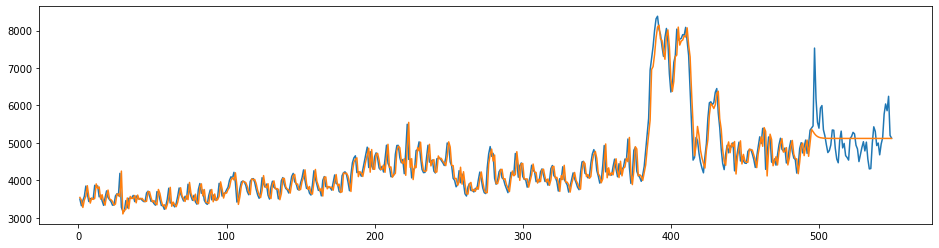

In [ ]:
mape = get_arima_result(english, english_test, 'english', arima_params)
result_mape_df['arima']['english'] = mape

**Russian**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 4.865028161332021%


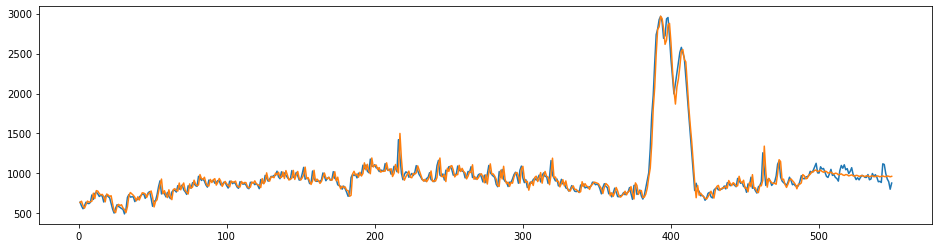

In [ ]:
mape = get_arima_result(russian, russian_test, 'russian', arima_params)
result_mape_df['arima']['russian'] = mape

**Chinese**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 4.588167730247989%


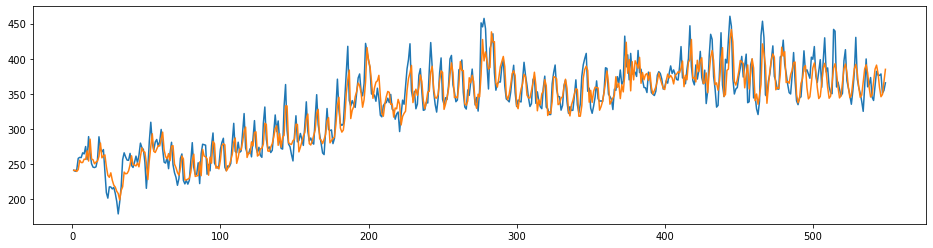

In [ ]:
mape = get_arima_result(chinese, chinese_test, 'chinese', arima_params)
result_mape_df['arima']['chinese'] = mape

**Japanese**

MAPE: 7.6245892368259724%


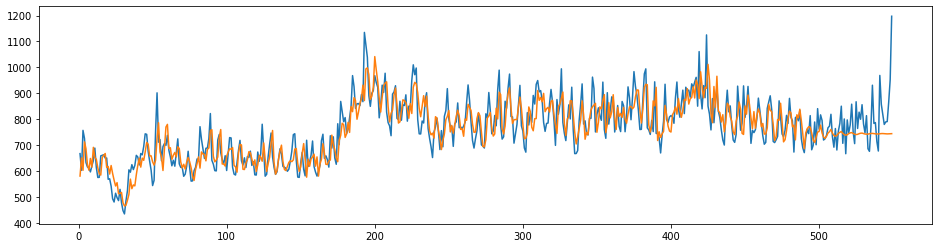

In [ ]:
mape = get_arima_result(japanese, japanese_test, 'japanese', arima_params)
result_mape_df['arima']['japanese'] = mape

**German**

MAPE: 7.739663525013466%


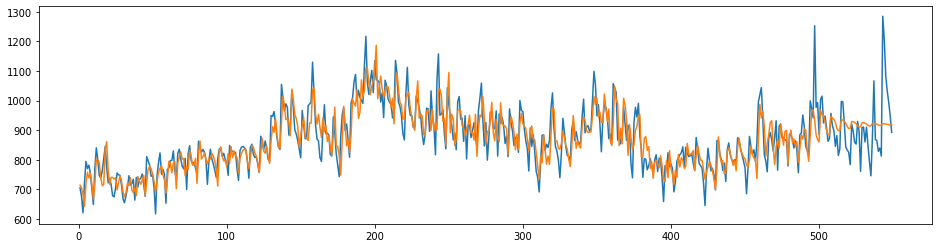

In [ ]:
mape = get_arima_result(german, german_test, 'german', arima_params)
result_mape_df['arima']['german'] = mape

**French**

MAPE: 8.818154265948005%


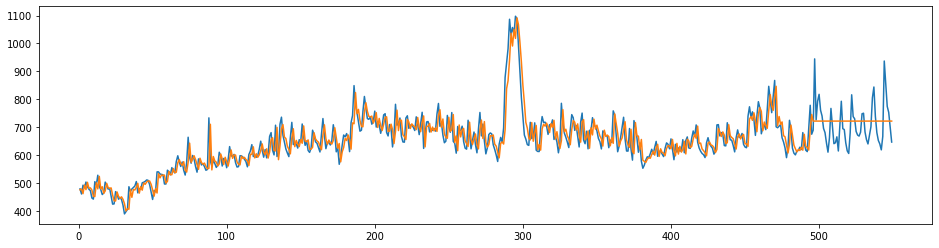

In [ ]:
mape = get_arima_result(french, french_test, 'french', arima_params)
result_mape_df['arima']['french'] = mape

**Spanish**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 19.422584180045536%


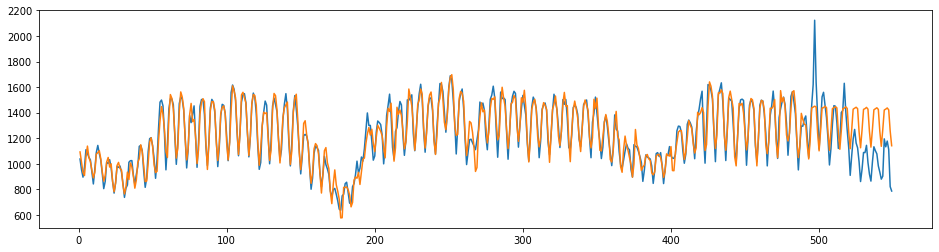

In [ ]:
mape = get_arima_result(spanish, spanish_test, 'spanish', arima_params)
result_mape_df['arima']['spanish'] = mape

In [ ]:
result_mape_df['arima']

{'english': 0.07198780282575713,
 'russian': 0.04865028161332021,
 'chinese': 0.045881677302479884,
 'japanese': 0.07624589236825972,
 'german': 0.07739663525013465,
 'french': 0.08818154265948004,
 'spanish': 0.19422584180045535}

So we see that except French and Spanish, for all the other languages ARIMA has MAPE in the range of 4-8%.

For French, it is 8.8% and for Spanish it is 19%.
We will see if these improve using SARIMA and SARIMAX.

#### SARIMA and SARIMAX

In [ ]:
def get_sarimax_result_with_exog(lang_df, lang_df_test, lang_name, sarima_params, exog, exog_test, m=7):

  p = sarima_params[lang_name]['p']
  d = sarima_params[lang_name]['d']
  q = sarima_params[lang_name]['q']

  P = sarima_params[lang_name]['P']
  D = sarima_params[lang_name]['D']
  Q = sarima_params[lang_name]['Q']

  plt.figure(figsize=(16,4))

  model = SARIMAX(lang_df.views.astype('float64'), order = (p,d,q), seasonal_order=(P,D,Q,m), exog = exog)
  #model = ARIMA(lang_df.views.astype('float64'), order = (p,d,q))
  model = model.fit()
  lang_df_test['sari_pred'] = model.forecast(steps=55, exog = exog_test)

  total = pd.DataFrame(lang_df['views'].append(lang_df_test['views']))
  total['sari_pred'] = list(model.predict(exog=exog)) + list(model.forecast(steps=55, exog=exog_test))
  
  plt.plot(total[1:]['views'])
  plt.plot(total[1:]['sari_pred'])
  #lang_df_test[['views','pred']].plot(style = '-o')
  mape = mean_absolute_percentage_error(lang_df_test['views'], lang_df_test['sari_pred'])
  print(f"MAPE: {mape*100}%")
  plt.show()
  return mape


def get_sarimax_result(lang_df, lang_df_test, lang_name, sarima_params, m=7):

  p = sarima_params[lang_name]['p']
  d = sarima_params[lang_name]['d']
  q = sarima_params[lang_name]['q']

  P = sarima_params[lang_name]['P']
  D = sarima_params[lang_name]['D']
  Q = sarima_params[lang_name]['Q']

  plt.figure(figsize=(16,4))

  model = SARIMAX(lang_df.views.astype('float64'), order = (p,d,q), seasonal_order=(P,D,Q,m))
  #model = ARIMA(lang_df.views.astype('float64'), order = (p,d,q))
  model = model.fit()
  lang_df_test['sari_pred'] = model.forecast(steps=55)

  total = pd.DataFrame(lang_df['views'].append(lang_df_test['views']))
  total['sari_pred'] = list(model.predict()) + list(model.forecast(steps=55))
  
  plt.plot(total[1:]['views'])
  plt.plot(total[1:]['sari_pred'])
  #lang_df_test[['views','pred']].plot(style = '-o')
  mape = mean_absolute_percentage_error(lang_df_test['views'], lang_df_test['sari_pred'])
  print(f"MAPE: {mape*100}%")
  plt.show()
  return mape

#results.plot_diagnostics(figsize=(8,8));

First we will look at the results from SARIMA alone. 

**English**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 6.91307690869422%


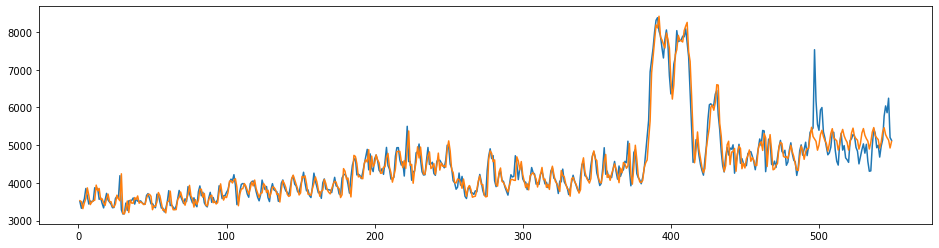

In [ ]:
mape = get_sarimax_result(english, english_test, 'english', sarimax_params)
result_mape_df['sarima']['english'] = mape

**Russian**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 5.1628389258786775%


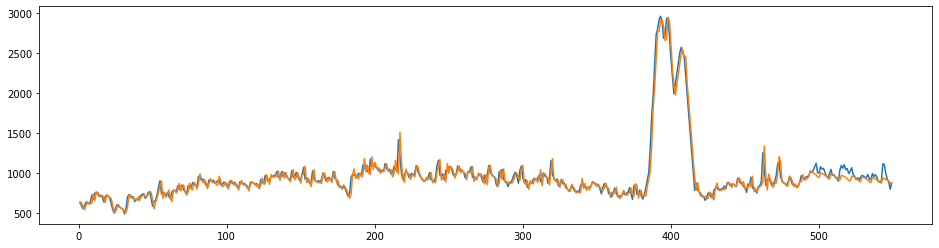

In [ ]:
mape = get_sarimax_result(russian, russian_test, 'russian', sarimax_params)
result_mape_df['sarima']['russian'] = mape

**Chinese**

MAPE: 4.03922900388207%


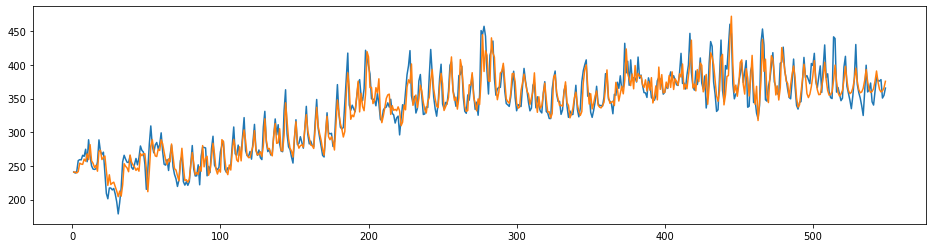

In [ ]:
mape = get_sarimax_result(chinese, chinese_test, 'chinese', sarimax_params)
result_mape_df['sarima']['chinese'] = mape

**Japanese**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 8.06664828459935%


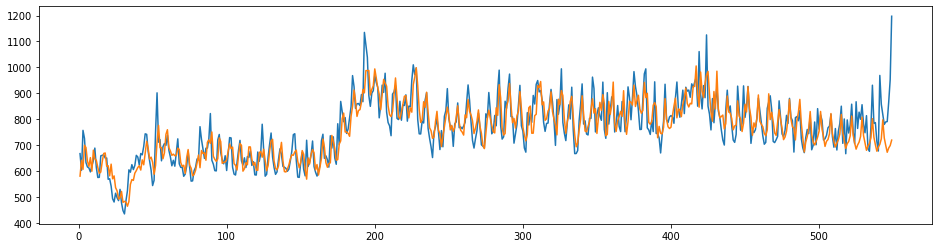

In [ ]:
mape = get_sarimax_result(japanese, japanese_test, 'japanese', sarimax_params)
result_mape_df['sarima']['japanese'] = mape

**German**

MAPE: 11.80952129506801%


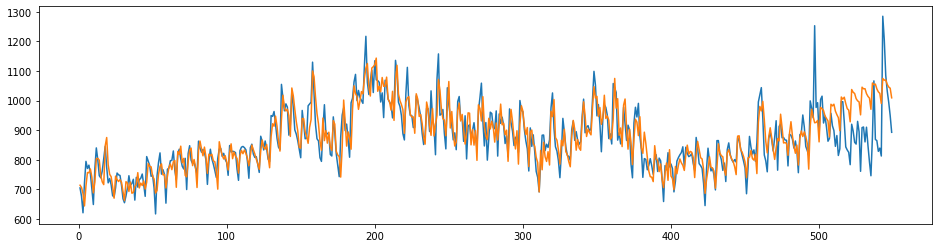

In [ ]:
mape = get_sarimax_result(german, german_test, 'german', sarimax_params)
result_mape_df['sarima']['german'] = mape

**French**

MAPE: 12.828455109324475%


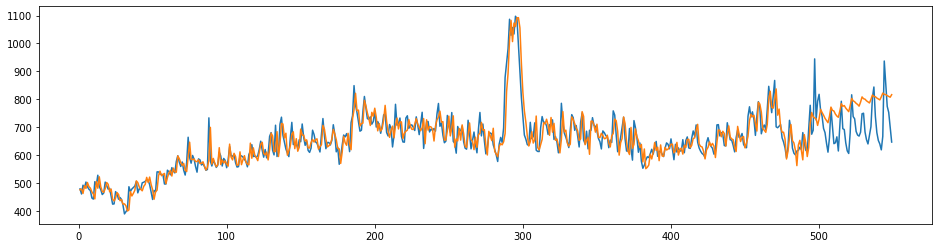

In [ ]:
mape = get_sarimax_result(french, french_test, 'french', sarimax_params)
result_mape_df['sarima']['french'] = mape

**Spanish**

MAPE: 26.96150728500889%


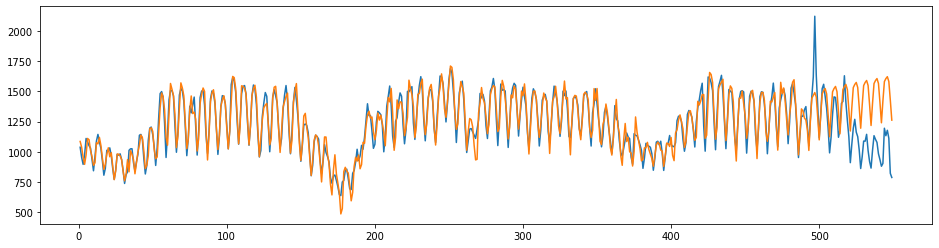

In [ ]:
mape = get_sarimax_result(spanish, spanish_test, 'spanish', sarimax_params)
result_mape_df['sarima']['spanish'] = mape

**Comparing ARIMA vs SARIMA**

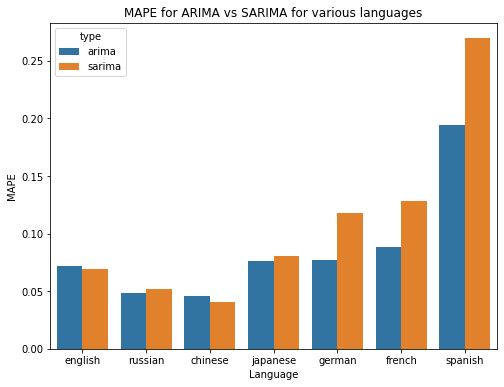

In [ ]:
rows = [result_mape_df['arima'], result_mape_df['sarima']]
res = pd.DataFrame.from_dict(rows, orient='columns')
res['type'] = ['arima','sarima']
res = pd.melt(res, id_vars=['type'], value_vars=['english', 'russian', 'chinese', 'japanese', 'german', 'french', 'spanish'])

plt.figure(figsize=(8,6))
sns.barplot(x = res['variable'], y = res['value'], hue = res['type'])
plt.xlabel('Language')
plt.ylabel('MAPE')
plt.title('MAPE for ARIMA vs SARIMA for various languages')
plt.show()

So, we notice the following :

 - **ARIMA** : Seems to work better for Russian, Japanese, German, French and Spanish.
 - **SARIMA** : Works better for English, Chinese.

Next we will move on to SARIMAX

MAPE: 10.310461406596332%


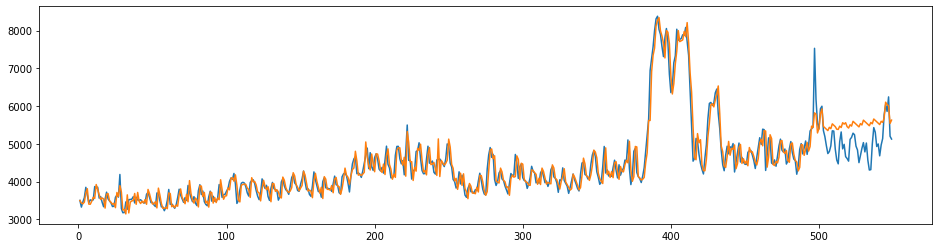

In [ ]:
exog_cols_en = ['weekday','weekend','day','month','year','exog','us','uk','ca','au']

mape = get_sarimax_result_with_exog(english, english_test, 'english', sarimax_params, english[exog_cols_en], english_test[exog_cols_en])
result_mape_df['sarimax']['english'] = mape

MAPE: 6.261298293993967%


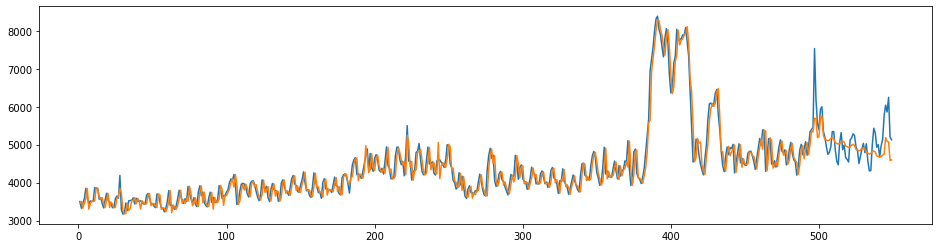

In [ ]:
exog_cols_en = ['exog','year'] 

mape = get_sarimax_result_with_exog(english, english_test, 'english', sarimax_params, english[exog_cols_en], english_test[exog_cols_en])
result_mape_df['sarimax']['english'] = mape

So, we see that for english, we get better results from SARIMAX by using the 'exog' (pertaining to dates on which specific campaigns were run) and 'year' column .

In [ ]:
print(result_mape_df['arima']['english'])
print(result_mape_df['sarima']['english'])
print(result_mape_df['sarimax']['english'])

0.07198780282575713
0.0691307690869422
0.06261298293993967


So we see that addition of exogenous variable improved MAPE for English language (albeit only by 0.7%)

Various other combinations could also be tried out.

**Japanese**

We can play around with various combinations of exogenous variables to see which yeilds better MAPE.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 6.392672978590248%


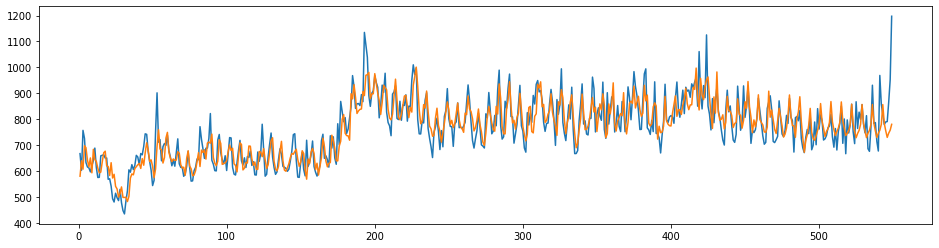

In [ ]:
#exog_cols_jp = ['weekday','weekend','day','month','year','jp']
#exog_cols_jp = ['weekday','month','year']
exog_cols_jp = ['month']

mape = get_sarimax_result_with_exog(japanese, japanese_test, 'japanese', sarimax_params, japanese[exog_cols_jp], japanese_test[exog_cols_jp])
result_mape_df['sarimax']['japanese'] = mape

In [ ]:
print(result_mape_df['arima']['japanese'])
print(result_mape_df['sarima']['japanese'])
print(result_mape_df['sarimax']['japanese'])

0.07624589236825972
0.0806664828459935
0.06392672978590248


**Chinese**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 3.8260578564643084%


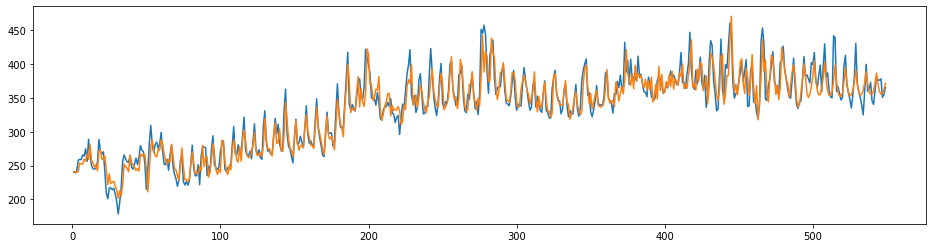

In [ ]:
#exog_cols_ch = ['weekday','weekend','day','month','year','tw','hk']
#exog_cols_ch = ['month','year','weekend'] #4.73
exog_cols_ch = ['month'] 

mape = get_sarimax_result_with_exog(chinese, chinese_test, 'chinese', sarimax_params, chinese[exog_cols_ch], chinese_test[exog_cols_ch])
result_mape_df['sarimax']['chinese'] = mape

In [ ]:
print(result_mape_df['arima']['chinese'])
print(result_mape_df['sarima']['chinese'])
print(result_mape_df['sarimax']['chinese'])

0.045881677302479884
0.04039229003882071
0.038260578564643086


**Russian**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 4.717777489870028%


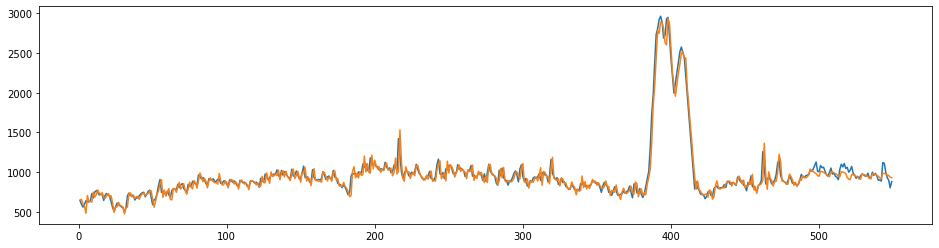

In [ ]:
#exog_cols_ru = ['weekend','month','year','day'] #6.9
#exog_cols_ru = ['weekend','day'] #5.5
exog_cols_ru = ['weekday', 'day']

mape = get_sarimax_result_with_exog(russian, russian_test, 'russian', sarimax_params, russian[exog_cols_ru], russian_test[exog_cols_ru])
result_mape_df['sarimax']['russian'] = mape

In [ ]:
print(result_mape_df['arima']['russian'])
print(result_mape_df['sarima']['russian'])
print(result_mape_df['sarimax']['russian'])

0.04865028161332021
0.051628389258786773
0.04717777489870028


**Spanish**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 12.385217319340994%


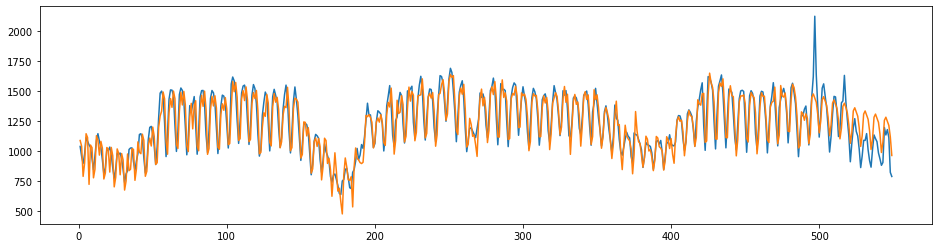

In [ ]:
#exog_cols_sp = ['weekday','weekend','day','month','year','mx','co','sp','ar'] #17
#exog_cols_sp = ['weekday','weekend','day','month','year'] #16
exog_cols_sp = ['month','year','weekend', 'day']

mape = get_sarimax_result_with_exog(spanish, spanish_test, 'spanish', sarimax_params, spanish[exog_cols_sp], spanish_test[exog_cols_sp])
result_mape_df['sarimax']['spanish'] = mape

In [ ]:
print(result_mape_df['arima']['spanish'])
print(result_mape_df['sarima']['spanish'])
print(result_mape_df['sarimax']['spanish'])

0.19422584180045535
0.2696150728500889
0.12385217319340994


**German**

MAPE: 10.375676951364724%


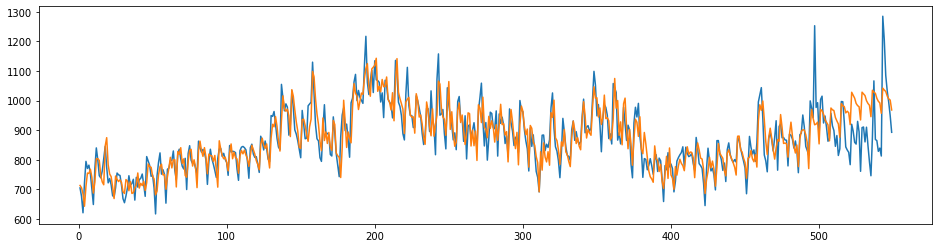

In [ ]:
#exog_cols_de = ['weekday','month','year','weekend', 'day'] #10.58
#exog_cols_de = ['weekday','month','day'] #10.45
exog_cols_de = ['day']

mape = get_sarimax_result_with_exog(german, german_test, 'german', sarimax_params, german[exog_cols_de], german_test[exog_cols_de])
result_mape_df['sarimax']['german'] = mape

In [ ]:
print(result_mape_df['arima']['german'])
print(result_mape_df['sarima']['german'])
print(result_mape_df['sarimax']['german'])

0.07739663525013465
0.1180952129506801
0.10375676951364725


**French**

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


MAPE: 11.266310344565031%


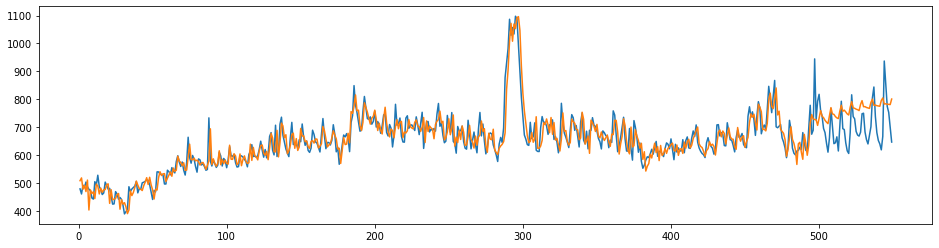

In [ ]:
#exog_cols_fr = ['weekend','month','year','weekday'] #11.26
exog_cols_fr = ['weekend','month','year','weekday']

mape = get_sarimax_result_with_exog(french, french_test, 'french', sarimax_params, french[exog_cols_fr], french_test[exog_cols_fr])
result_mape_df['sarimax']['french'] = mape

In [ ]:
print(result_mape_df['arima']['french'])
print(result_mape_df['sarima']['french'])
print(result_mape_df['sarimax']['french'])

0.08818154265948004
0.12828455109324474
0.11266310344565031


#### **Comparing ARIMA, SARIMA and SARIMAX**

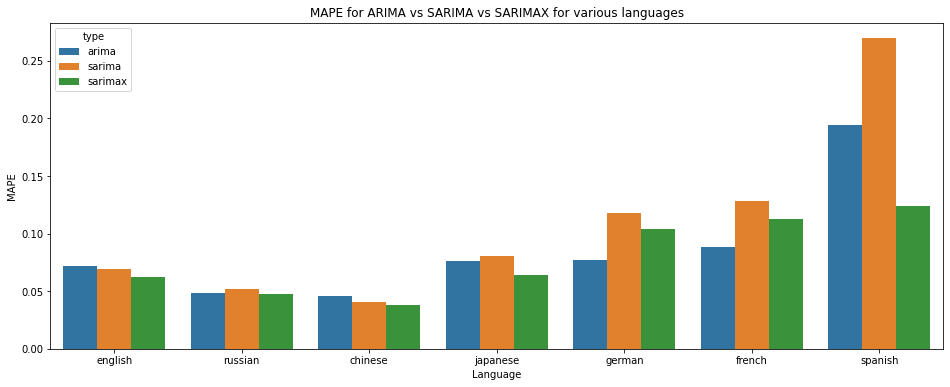

In [ ]:
rows = [result_mape_df['arima'], result_mape_df['sarima'], result_mape_df['sarimax']]
res = pd.DataFrame.from_dict(rows, orient='columns')
res['type'] = ['arima','sarima', 'sarimax']
res = pd.melt(res, id_vars=['type'], value_vars=['english', 'russian', 'chinese', 'japanese', 'german', 'french', 'spanish'])

plt.figure(figsize=(16,6))
sns.barplot(x = res['variable'], y = res['value'], hue = res['type'])
plt.xlabel('Language')
plt.ylabel('MAPE')
plt.title('MAPE for ARIMA vs SARIMA vs SARIMAX for various languages')
plt.show()

- **SARIMAX** gives better result for English, Russian, Chinese, Japanese and Spanish
    - English : MAPE is 6.26%
    - Russian : MAPE is 4.71%
    - Chinese : MAPE is 3.82%
    - Japanese : MAPE is 6.39%
    - Spanish : MAPE is 12.3%

- **ARIMA** gives better result for German and French.
    - German : MAPE is 7.73%
    - French : MAPE is 8.81%

For most languages the MAPE lies in the range of 4-8% (Except Spanish, which is 12%)

#### Regression

We could use XGBoost Regressor for this purpose.

We already have engineered some additional features while data preparation step. 

In [ ]:
from xgboost import XGBRegressor

We define a fucntion for the regression.

In [ ]:
def run_xgb(lang_df, lang_test_df, cols_list):
  xgb_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
  lang_df_x = lang_df[cols_list]
  lang_df_y = lang_df[['views']]
  xgb_model.fit(lang_df_x, lang_df_y)
  yhat = xgb_model.predict(lang_test_df[cols_list])
  mape = mean_absolute_percentage_error(lang_test_df['views'],yhat)
  print("Mape : ", mape*100, "%")

In [ ]:
run_xgb(english, english_test, ['weekday','weekend','day','month','year','exog'])

[17:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  6.140502077208387 %


So, we see that the results obtained for English from XGBoost regression are also pretty good. 

In [ ]:
run_xgb(spanish, spanish_test, ['weekday','weekend','day','month','year'])

[17:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  10.537636247100092 %


For Spanish, XGBoost outperforms all the other methods!

In [ ]:
run_xgb(russian, russian_test, ['weekday','weekend','day','month','year'])

[17:15:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  9.490404265624035 %


For Russian, SARIMAX performance is still the best.

In [ ]:
run_xgb(german, german_test, ['weekday','weekend','day','month','year'])

[17:17:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  7.716771341144901 %


For German, XGBoost only marginally outperforms ARIMA.

In [ ]:
run_xgb(french, french_test, ['weekday','weekend','day','month','year'])

[17:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  6.345219648479675 %


For French, XGBoost outperforms ARIMA, and gives best performance.

In [ ]:
run_xgb(chinese, chinese_test, ['weekday','weekend','day','month','year'])

[17:19:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  4.762466915453642 %


For Chinese as well, SARIMAX performance is still the best.

In [ ]:
run_xgb(japanese, japanese_test, ['weekday','weekend','day','month','year'])

[17:19:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mape :  6.53199057840093 %


For Japanese, SARIMAX is slightly better than XGBoost.

#### FBProphet

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

We will set up a method for running FBProphet. It will have the option to incorporate the following.
 - Custom Seasonalities
 - Custom Country Holiday
 - OPtion to include/exclude built-in seasonalities
 - Custom Exogenous variables/ additional regressors

 We will test it out on a few languages.

In [ ]:
def run_prophet(lang_df, lang_df_test, exogenous_vars=None, holiday_list=None, weekly=True, daily=True, yearly=True, seasonality_custom=None):
  prophet_model = Prophet(interval_width = 0.95, weekly_seasonality = weekly, daily_seasonality=daily, yearly_seasonality=yearly)
  
  if holiday_list is not None:
    for country in holiday_list:
      prophet_model.add_country_holidays(country_name = country)

  if exogenous_vars is not None:
    for reg in exogenous_vars:
      prophet_model.add_regressor(reg)

  if seasonality_custom is not None:
    for ses_name in seasonality_custom:
      prophet_model.add_seasonality(name=ses_name, period=seasonality_custom[ses_name][0], fourier_order=seasonality_custom[ses_name][1])
  
  cols_list = ['ds','y']
  if exogenous_vars is not None:
    cols_list += exogenous_vars

  prophet_model.fit(lang_df.rename(columns = {'date':'ds', 'views':'y'})[cols_list])

  future = prophet_model.make_future_dataframe(periods=55,freq = "D")

  if exogenous_vars is not None:
    for reg in exogenous_vars :
      future[reg] = list(lang_df[reg].values) + list(lang_df_test[reg].values)
  
  forecast_fb = prophet_model.predict(future)
  fig = prophet_model.plot(forecast_fb)

  mape = mean_absolute_percentage_error(lang_df_test['views'], forecast_fb['yhat'][495:])
  print("Mape : ", mape)

  return mape

**English**

DEBUG:cmdstanpy:input tempfile: /tmp/tmp57m7m6wl/mlytft89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp57m7m6wl/o2bw4pjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77633', 'data', 'file=/tmp/tmp57m7m6wl/mlytft89.json', 'init=/tmp/tmp57m7m6wl/o2bw4pjb.json', 'output', 'file=/tmp/tmpl82k8g2n/prophet_model-20220919161350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:13:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:13:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mape :  0.06262741342024244


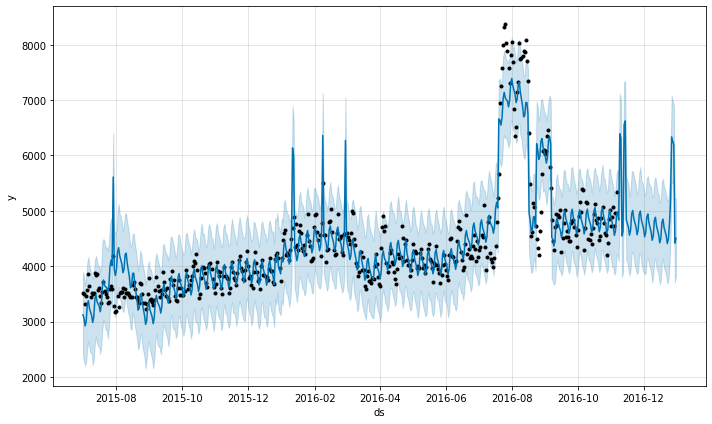

In [ ]:
eng_ex_vars = ['exog','year']
eng_holidays = ['US','UK','CA','AU']

mape = run_prophet(english, english_test, eng_ex_vars, eng_holidays)
result_mape_df['prophet']['english'] = mape

**Spanish**

DEBUG:cmdstanpy:input tempfile: /tmp/tmp57m7m6wl/5wg1ib42.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp57m7m6wl/62d_d1t7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65428', 'data', 'file=/tmp/tmp57m7m6wl/5wg1ib42.json', 'init=/tmp/tmp57m7m6wl/62d_d1t7.json', 'output', 'file=/tmp/tmpurmjqiyo/prophet_model-20220919161547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mape :  0.13261406548876858


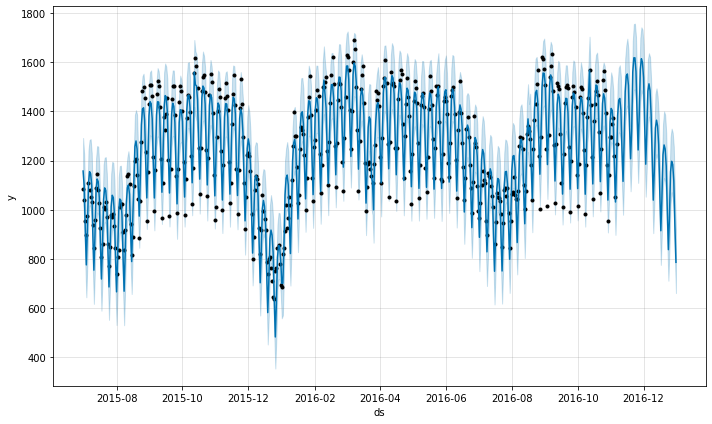

In [ ]:
esp_ex_vars = ['month','year','weekend', 'day']
esp_holidays = ['MX','CO','ES','AR']
esp_ses = {'biannual':[200,10]} #custom seasonality

mape = run_prophet(spanish, spanish_test, esp_ex_vars, esp_holidays, True, True, True, esp_ses)
result_mape_df['prophet']['spanish'] = mape

### Some Insights

1. Some inferences that can be made from the data visualizations.
  - English has the highest number of views, since most wikipedia articles are written in English. 
 
  - The English and Russian series have spikes from mid-July 2016 to mid-August 2016.

  - The English data also has spikes between January and March 2016, and then again around the beginning of September 2016, November 2016 and then towards the end of December 2016. 
  - The Spanish data seems to be fluctuating periodically every 6 months.
  - **Total Pages** : 
    - English has the highest number of pages, followed by Japanese, German, French, Chinese, Russian and Spanish.
    - There's also quite a few wikimedia and mediawiki pages. The average views on wikimedia pages are far fewer than wikipedia.
    - So the highest number of pages had access type as 'all-access', followed by  'mobile-web' and 'desktop' which are almost similar (mobile is slightly higher) and nearly half the value of 'all-access'.

  - **Unique Pages** : 
    - English also has the highest number of unique pages, followed by Japanese, German, French, Chinese, Russian and Spanish.
    - Here, 'all-access' once again is the highest (around 32 K unique pages), however, the difference with the other two methods is not as stark (both are around 28K).
  - 'all-access' origin is lot more frequent than 'spider' origin.
  - It appears that the top 2 pages in English and Russian languages also contribute most starkly to the peaks of their aggregate (total) language wise views. Perhaps, these peaks were triggered by certain events, and the top pages were the sites that most viewers landed up on first, while looking for those events.

 - The effect of the top pages is not so pronounced in the other languages, indicating that their top pages probably do not correspond to the events leading to spikes.
 - **English specific**:
    - It appears that the months of March, April and May tend to get the least traffic.
    - The month of August got the highest traffic. This could be due to the 2016 Olympics.
    - Monday seems to have gotten relatively higher views than the rest of the days.
    - There were no exogenous variable effect recorded for the months of March, April, May June and October.
    - The views are clearly higher when there were exogenous events/campaigns.

2. It might make sense to calculate cost estimate for the web pages to be able to obtain cost per view.

3. Performance and difference between arima, sarima & sarimax.
 - Discussed in Modeling and Forecasting section (Comparing ARIMA, SARIMA and SARIMAX). Aside from performance, the main differences are : inclusion of seasonality to ARIMA leads to SARIMA, and SARIMA augmented further with exogenous variables leads to SARIMAX.
